<a href="https://colab.research.google.com/github/sam1610/AHliaML/blob/main/Copy_of_Asmahan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \text { Recommendation  &  Prediction   for Student's Data 

---

Analysis }$$

In [1]:
! pip  install   scikit-learn  -U

     |████████████████████████████████| 22.3MB 1.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
#### for Esmahan PC
!ls  /content/drive/MyDrive/portalAnalysis/

ls: cannot access '/content/drive/MyDrive/portalAnalysis/': No such file or directory


In [3]:
#### for Esmahan PC
! pwd

/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pwd

'/content'

In [ ]:
! git clone https://github.com/sam1610/TimeSeriesAnalysisWithPython.git

Cloning into 'TimeSeriesAnalysisWithPython'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [6]:
cd /content/drive/MyDrive/portalAnalysis/

/content/drive/MyDrive/portalAnalysis


## $$\Large \text {Student's General Info. Dataset}$$

In [7]:
import pandas as pd
import numpy as np
import random
import string
from random import randint
import matplotlib.pyplot as plt
 

In [8]:
## الصفوف العينة هي : من الصف الأول الابتدائي و حتى الثالث الاعدادي

grades={
    "06":"9","07":"8",
    "08":"7", "09":"6", "10":"5", "11":"4",
    "12":"3", "13":"2", "14":"1"
}

In [9]:
###  الطلبة العينة من 10 مدارس عشوائيًا (500 طالب) ##

list_std=[]
for i in range(500):
  birth_year=random.choice(["06", "07", "08", "09","10","11","12","13","14"])
  student= {
  "student_id": ''.join(random.choice(string.digits) for _ in range(5)) ,
  "birth_year": birth_year,
  "birth_month": random.choice(["01", "02", "03", "04", "05", 
                                "06", "07", "08", "09","10","11","12"]),
  "school": random.choice([ "Sc_"+str(j) for j in range(10)]),
  #"Course_code": random.choice([ "Course_"+str(i) for i in range(10)]),
  "grade": grades[birth_year],  #int((9*np.random.rand(1)+1)),
  "gender": random.choice(["M", "F"]),
  "governorate": random.choice(["North", "South", "Caiptal", "Muharraq"])
         } 
  list_std.append(student)
  # for k in range(6):
      
df_st=pd.DataFrame(list_std)


In [10]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   500 non-null    object
 1   birth_year   500 non-null    object
 2   birth_month  500 non-null    object
 3   school       500 non-null    object
 4   grade        500 non-null    object
 5   gender       500 non-null    object
 6   governorate  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [11]:
df_st.shape

(500, 7)

In [12]:
df_st.insert(0, 'student_ID', df_st['birth_year'].astype(str) + df_st['birth_month'].astype(str)+df_st.pop('student_id').astype(str))

In [13]:
df_st.to_csv("./Data/Edited-Students.csv")

## $$\Large \text{  Students' portal activity dataset}$$

In [ ]:
#df_st=pd.read_csv("./Data/Edited-Students.csv", index_col=0)

In [14]:
df_st.sample(4)

,student_ID,birth_year,birth_month,school,grade,gender,governorate
95,060427411,06,04,Sc_2,9,M,Muharraq
497,120745044,12,07,Sc_1,3,F,North
434,100630593,10,06,Sc_9,5,F,North
178,101221371,10,12,Sc_0,5,M,Muharraq


In [15]:
# Quizz= 0 ;     Assignment=1
course_ref = {
    'g1_1': {"0": 8, "1": 3},
    'g1_2': {"0": 7, "1": 7},
    'g1_3': {"0": 5, "1": 2},
    'g1_4': {"0": 9, "1": 6},
    'g1_5': {"0": 7, "1": 1},
    'g1_6': {"0": 3, "1": 3},

    'g2_1': {"0": 9, "1": 4}, 
    'g2_2': {"0": 6, "1": 6}, 
    'g2_3': {"0": 3, "1": 4}, 
    'g2_4': {"0": 10, "1": 5}, 
    'g2_5': {"0": 3, "1": 9}, 
    'g2_6': {"0": 10, "1": 3}, 

    'g3_1': {"0": 7, "1": 4}, 
    'g3_2': {"0": 8, "1": 3}, 
    'g3_3': {"0": 10, "1": 8}, 
    'g3_4': {"0": 5, "1": 7}, 
    'g3_5': {"0": 10, "1": 9}, 
    'g3_6': {"0": 5, "1": 5}, 

    'g4_1': {"0": 7, "1": 4}, 
    'g4_2': {"0": 2, "1": 8}, 
    'g4_3': {"0": 5, "1": 8}, 
    'g4_4': {"0": 6, "1": 3}, 
    'g4_5': {"0": 8, "1": 3}, 
    'g4_6': {"0": 2, "1": 2}, 

    'g5_1': {"0": 9, "1": 4}, 
    'g5_2': {"0": 10, "1": 2}, 
    'g5_3': {"0": 6, "1": 7}, 
    'g5_4': {"0": 7, "1": 3}, 
    'g5_5': {"0": 10, "1": 4}, 
    'g5_6': {"0": 9, "1": 4}, 

    'g6_1': {"0": 4, "1": 4}, 
    'g6_2': {"0": 10, "1": 9}, 
    'g6_3': {"0": 5, "1": 8}, 
    'g6_4': {"0": 4, "1": 6}, 
    'g6_5': {"0": 8, "1": 8}, 
    'g6_6': {"0": 2, "1": 5}, 

    'g7_1': {"0": 3, "1": 6}, 
    'g7_2': {"0": 7, "1": 9}, 
    'g7_3': {"0": 6, "1": 4}, 
    'g7_4': {"0": 10, "1": 8}, 
    'g7_5': {"0": 4, "1": 6}, 
    'g7_6': {"0": 1, "1": 5}, 
    
    'g8_1': {"0": 7, "1": 3}, 
    'g8_2': {"0": 5, "1": 4}, 
    'g8_3': {"0": 2, "1": 4}, 
    'g8_4': {"0": 8, "1": 3}, 
    'g8_5': {"0": 7, "1": 2}, 
    'g8_6': {"0": 5, "1": 4},

    'g9_1': {"0": 9, "1": 4}, 
    'g9_2': {"0": 6, "1": 8}, 
    'g9_3': {"0": 3, "1": 7}, 
    'g9_4': {"0": 9, "1": 3}, 
    'g9_5': {"0": 10, "1": 2}, 
    'g9_6': {"0": 5, "1": 5},  
    }


In [16]:
df_st.student_ID.nunique()

500

##  Data  Avg

In [ ]:
list=[]
for i, k  in zip(df_st.student_ID, df_st.grade):
  for j in range (1, int((7*np.random.rand(1)+1))):
    course_id=random.choice(["g"+str(k)+"_"+str(l) for l in range(1,7)])
    activities= {
        "student_ID": i ,
        "Course_code":course_id,   #random.choice([ "Course_"+str(k) for k in range(6)]), 

        "Quiz_count": course_ref[course_id]["0"] , #np.random.randint(5,30),
        "Quiz_Avg_cp": int((np.random.rand(1)*2+1)), 
        "Quiz_Avg_mark": int((10*np.random.rand(1))),
        "Quiz_Avg_diff":  int((4*np.random.rand(1)+1)),
        "Quiz_Avg_subm_time": int((870*np.random.rand(1)+30)) , #30 secs - 15 mins
        "Passed_Quizz": int((course_ref[course_id]["0"]*np.random.rand(1))+1),
        

        "Assignment_count": course_ref[course_id]["1"] , #np.random.randint(5,30),
        "Assignment_Avg_cp": int((np.random.rand(1)*2+1)), 
        "Asg_Avg_mark": int((10*np.random.rand(1))),
        "Asg_Avg_diff":  int((4*np.random.rand(1)+1)),
        "Asg_Avg_subm_time": int((2*np.random.rand(1)+3)) , #  3-5 days
        "Passed_Asg": int((course_ref[course_id]["1"]*np.random.rand(1))+1),



        "course_lastyear_mark": np.random.randint(60,101),
        "video_sec": int(np.random.randint(3601)),
        "nb_video": int(np.random.randint(20)),
        "nb_download": int(np.random.randint(20)),
        "nb_discus_participate" :int(np.random.randint(30)) 
        
        }
    list.append(activities)
      
df_=pd.DataFrame(list)

In [ ]:
df_.keys()

Index(['student_ID', 'Course_code', 'Quiz_count', 'Quiz_Avg_cp',
       'Quiz_Avg_mark', 'Quiz_Avg_diff', 'Quiz_Avg_subm_time', 'Passed_Quizz',
       'Assignment_count', 'Assignment_Avg_cp', 'Asg_Avg_mark', 'Asg_Avg_diff',
       'Asg_Avg_subm_time', 'Passed_Asg', 'course_lastyear_mark', 'video_sec',
       'nb_video', 'nb_download', 'nb_discus_participate'],
      dtype='object')

In [ ]:
df_.sample(4)

,student_ID,Course_code,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Passed_Quizz,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,Passed_Asg,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate
1071,070714398,g8_1,7,2,9,2,509,7,3,2,2,4,3,3,85,294,15,1,12
219,090883377,g6_6,2,2,1,2,887,2,5,1,9,4,4,2,88,2042,5,5,27
41,080659704,g7_6,1,2,1,2,144,1,5,2,4,1,3,4,75,2679,2,2,16
1152,070995374,g8_1,7,2,8,1,736,1,3,1,1,1,3,3,87,3396,8,8,17


In [ ]:
df_.shape

(1497, 19)

In [ ]:
df_.groupby("Course_code").Quiz_Avg_subm_time.agg("max")

Course_code
g1_1    843
g1_2    876
g1_3    878
g1_4    878
g1_5    869
g1_6    893
g2_1    818
g2_2    779
g2_3    782
g2_4    874
g2_5    858
g2_6    887
g3_1    872
g3_2    817
g3_3    835
g3_4    883
g3_5    868
g3_6    836
g4_1    840
g4_2    897
g4_3    798
g4_4    776
g4_5    884
g4_6    888
g5_1    891
g5_2    868
g5_3    866
g5_4    864
g5_5    880
g5_6    870
g6_1    882
g6_2    860
g6_3    878
g6_4    893
g6_5    882
g6_6    887
g7_1    884
g7_2    857
g7_3    863
g7_4    887
g7_5    867
g7_6    897
g8_1    873
g8_2    874
g8_3    852
g8_4    874
g8_5    863
g8_6    887
g9_1    824
g9_2    887
g9_3    886
g9_4    870
g9_5    888
g9_6    848
Name: Quiz_Avg_subm_time, dtype: int64

In [ ]:
columns=["Qz_Max_time", "Asg_max_time", "Qz_Max_Mk", "Asg_Max_Mk"],


In [ ]:
max_val= pd.pivot_table( df_, index= ["Course_code"],                   
values=["Quiz_Avg_subm_time","Asg_Avg_subm_time","Quiz_Avg_mark", "Asg_Avg_mark" ] , 
aggfunc="max").rename(columns={'Quiz_Avg_subm_time': 'Qz_Max_time',
                                 "Asg_Avg_subm_time": "Asg_max_time",
                                 "Quiz_Avg_mark": "Qz_Max_Mk", 
                                 "Asg_Avg_mark": "Asg_Max_Mk" })
max_val

,Asg_Max_Mk,Asg_max_time,Qz_Max_Mk,Qz_Max_time
Course_code,,,,
g1_1,9,4,9,843
g1_2,9,4,7,876
g1_3,9,4,9,878
g1_4,9,4,8,878
g1_5,9,4,9,869
g1_6,9,4,9,893
g2_1,9,4,9,818
g2_2,9,4,9,779
g2_3,9,4,9,782


In [ ]:
df_=pd.merge(max_val, df_, on="Course_code")

#### Quizz Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_["Quiz_Avg_score"]=np.log1p( 
    df_.Qz_Max_time/df_.Quiz_Avg_subm_time +df_.Quiz_Avg_diff* df_.Quiz_Avg_cp
    )*df_["Quiz_Avg_mark"]**2/df_.Qz_Max_Mk 
     # ( np.log1p())
    # this equation can be bettered  يحسن by intergating participation, downloadVideo features

In [ ]:
df_.shape

(1453, 23)

In [ ]:
df_act= df_.drop_duplicates(subset=["student_ID",  "Course_code"], keep="last" )

In [ ]:

df_act.sample(4)

,Course_code,Asg_Max_Mk,Asg_max_time,Qz_Max_Mk,Qz_Max_time,student_ID,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Passed_Quizz,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Quiz_Avg_score
487,g3_5,9,4,9,892,121111326,10,2,1,3,469,6,9,1,6,2,4,70,1768,19,10,17,0.242919
48,g1_2,9,4,9,898,141040877,8,2,1,2,626,3,7,2,0,4,3,88,1591,4,8,27,0.206853
887,g6_1,8,4,9,891,090532125,4,2,0,4,891,4,4,2,5,3,3,90,2880,2,18,18,0.000000
1031,g7_1,9,4,9,878,080940969,3,1,3,3,330,4,6,1,9,2,3,80,1902,12,8,17,1.896210


In [ ]:
df_act.shape

(1140, 23)

In [ ]:
df_act[df_act.duplicated(["student_ID", "Course_code"])].head(20)

,Course_code,Asg_Max_Mk,Asg_max_time,Qz_Max_Mk,Qz_Max_time,student_ID,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Passed_Quizz,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Quiz_Avg_score


In [ ]:
df_act.Course_code.unique()

array(['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g2_1', 'g2_2',
       'g2_3', 'g2_4', 'g2_5', 'g2_6', 'g3_1', 'g3_2', 'g3_3', 'g3_4',
       'g3_5', 'g3_6', 'g4_1', 'g4_2', 'g4_3', 'g4_4', 'g4_5', 'g4_6',
       'g5_1', 'g5_2', 'g5_3', 'g5_4', 'g5_5', 'g5_6', 'g6_1', 'g6_2',
       'g6_3', 'g6_4', 'g6_5', 'g6_6', 'g7_1', 'g7_2', 'g7_3', 'g7_4',
       'g7_5', 'g7_6', 'g8_1', 'g8_2', 'g8_3', 'g8_4', 'g8_5', 'g8_6',
       'g9_1', 'g9_2', 'g9_3', 'g9_4', 'g9_5', 'g9_6'], dtype=object)

In [ ]:

df_act.to_csv("./Data/Edited-StActivities.csv")

In [ ]:
#  Dataset read
#df=pd.read_csv("./Data/activities.csv", index_col=0)

## $$\ \text{  Data Merging  }$$

In [ ]:
df=pd.merge(df_st, df_act, on="student_ID")

In [ ]:
df.sample(10)

,student_ID,birth_year,birth_month,school,grade,gender,governorate,Course_code,Asg_Max_Mk,Asg_max_time,Qz_Max_Mk,Qz_Max_time,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Passed_Quizz,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Quiz_Avg_score
490,080784381,08,07,Sc_2,7,F,South,g7_1,9,4,9,878,3,2,5,1,400,6,6,2,6,4,3,98,660,16,1,26,4.576935
794,090236501,09,02,Sc_8,6,F,Muharraq,g6_6,9,4,9,831,2,1,9,1,476,4,5,1,1,3,3,69,55,10,1,3,11.885713
218,091079766,09,10,Sc_9,6,M,Muharraq,g6_5,9,4,9,895,8,1,0,3,129,1,8,1,9,1,3,63,718,9,18,13,0.000000
1139,141210792,14,12,Sc_9,1,M,South,g1_2,9,4,9,898,8,2,1,2,179,2,7,2,0,2,4,74,1355,9,13,3,0.256029
464,121123319,12,11,Sc_1,3,F,Muharraq,g3_1,9,4,9,878,7,1,6,1,411,4,4,1,9,4,3,85,953,1,17,25,5.679161
952,120799228,12,07,Sc_2,3,M,North,g3_3,9,4,9,880,10,2,5,3,621,3,8,2,3,3,4,71,1053,16,10,22,5.917394
13,060624948,06,06,Sc_7,9,F,North,g9_4,8,4,9,745,9,2,6,2,675,2,3,1,1,1,3,71,3458,15,1,25,7.235583
195,060446201,06,04,Sc_7,9,M,Caiptal,g9_3,9,4,9,868,3,1,8,2,215,2,7,1,7,2,3,93,1563,3,0,19,13.875283
363,121134868,12,11,Sc_9,3,M,North,g3_5,9,4,9,892,10,2,7,2,719,9,9,1,7,2,3,67,297,10,9,15,9.969204
739,120101698,12,01,Sc_6,3,F,South,g3_2,9,4,9,874,8,2,6,4,874,1,3,1,9,1,3,87,655,6,3,5,9.210340


In [ ]:
#df[df['student_ID'] == '130255655'] 

## $$\Large \text{  Clustering & Classification  }$$

In [ ]:
### DON'T RUN IT ... IT MIXES THE STUDENT_ID with YEAR & MONTH

df.birth_year= df.birth_year.astype(int)
df.birth_month=df.birth_month.astype(int)

In [ ]:
#df[df['student_ID'] == '130255655'].birth_year.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1139
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_ID             1140 non-null   object 
 1   birth_year             1140 non-null   int64  
 2   birth_month            1140 non-null   int64  
 3   school                 1140 non-null   object 
 4   grade                  1140 non-null   object 
 5   gender                 1140 non-null   object 
 6   governorate            1140 non-null   object 
 7   Course_code            1140 non-null   object 
 8   Asg_Max_Mk             1140 non-null   int64  
 9   Asg_max_time           1140 non-null   int64  
 10  Qz_Max_Mk              1140 non-null   int64  
 11  Qz_Max_time            1140 non-null   int64  
 12  Quiz_count             1140 non-null   int64  
 13  Quiz_Avg_cp            1140 non-null   int64  
 14  Quiz_Avg_mark          1140 non-null   int64  
 15  Quiz

In [ ]:
### BE CAREFUL IF YOU NEED IT OR NOT
for col in df.select_dtypes("object").columns:
  df[col]=df[col].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1139
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   student_ID             1140 non-null   category
 1   birth_year             1140 non-null   int64   
 2   birth_month            1140 non-null   int64   
 3   school                 1140 non-null   category
 4   grade                  1140 non-null   category
 5   gender                 1140 non-null   category
 6   governorate            1140 non-null   category
 7   Course_code            1140 non-null   category
 8   Asg_Max_Mk             1140 non-null   int64   
 9   Asg_max_time           1140 non-null   int64   
 10  Qz_Max_Mk              1140 non-null   int64   
 11  Qz_Max_time            1140 non-null   int64   
 12  Quiz_count             1140 non-null   int64   
 13  Quiz_Avg_cp            1140 non-null   int64   
 14  Quiz_Avg_mark          1140 non-null   i

In [ ]:
#df[ df.isna().any(axis=1)].head()

In [ ]:
df_act.to_csv("./Data/Edited-StActivities.csv")

In [ ]:
df.groupby("grade").grade.agg("count")

grade
1    144
2    138
3    149
4    149
5    114
6     98
7    129
8    118
9    102
Name: grade, dtype: int64

### Ranking

In [ ]:
#bin_labels= ['E', 'D', 'C', 'B', "A"]
#df['Ranking'] = pd.cut(df["Quiz_Avg_score"],
                             # bins=[0, 5, 10, 14, 18, max(df.Quiz_Avg_score)],
                             # labels=bin_labels)

In [ ]:
df.sample(4)

,student_ID,birth_year,birth_month,school,grade,gender,governorate,Course_code,Asg_Max_Mk,Asg_max_time,Qz_Max_Mk,Qz_Max_time,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Passed_Quizz,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Quiz_Avg_score
317,110804439,11,8,Sc_2,4,M,South,g4_5,8,4,9,883,8,1,1,3,362,2,3,2,8,1,4,98,3544,8,3,14,0.206934
15,060967590,6,9,Sc_4,9,M,Muharraq,g9_3,9,4,9,868,3,2,7,3,69,5,7,1,2,1,4,100,1780,8,8,17,16.194466
926,130956532,13,9,Sc_2,2,F,Muharraq,g2_5,9,4,9,885,3,1,3,3,300,4,9,2,4,4,4,85,772,12,18,19,1.938742
935,111225250,11,12,Sc_2,4,M,Caiptal,g4_5,8,4,9,883,8,2,1,1,107,1,3,1,1,3,4,87,1314,8,1,6,0.268953


In [ ]:
bin_labels= ['E', 'D', 'C', 'B', "A"]
df['Qz_Ranking'] = pd.qcut(df["Quiz_Avg_score"],
                              q=[0, 0.25, 0.5, 0.75, 0.825, 1],
                              labels=bin_labels)

In [ ]:
df["Quiz_Avg_score"].quantile([0, 0.25, 0.5, 0.75, 0.825, 1])

0.000     0.000000
0.250     0.932750
0.500     4.433501
0.750    10.109388
0.825    12.761585
1.000    28.321353
Name: Quiz_Avg_score, dtype: float64

In [ ]:
df[["Qz_Ranking", "Quiz_Avg_score"]].sample(5)

,Qz_Ranking,Quiz_Avg_score
410,D,1.987598
128,D,3.062298
505,E,0.000000
739,C,9.210340
1037,C,10.102263


####  Assignement Ranking

In [ ]:
df.keys()

Index(['student_ID', 'birth_year', 'birth_month', 'school', 'grade', 'gender',
       'governorate', 'Course_code', 'Asg_Max_Mk', 'Asg_max_time', 'Qz_Max_Mk',
       'Qz_Max_time', 'Quiz_count', 'Quiz_Avg_cp', 'Quiz_Avg_mark',
       'Quiz_Avg_diff', 'Quiz_Avg_subm_time', 'Passed_Quizz',
       'Assignment_count', 'Assignment_Avg_cp', 'Asg_Avg_mark', 'Asg_Avg_diff',
       'Asg_Avg_subm_time', 'course_lastyear_mark', 'video_sec', 'nb_video',
       'nb_download', 'nb_discus_participate', 'Quiz_Avg_score', 'Qz_Ranking'],
      dtype='object')

In [ ]:
df["Asg_Avg_score"]=np.log1p( 
    df.Asg_max_time/df.Asg_Avg_subm_time +df.Asg_Avg_diff* df.Assignment_Avg_cp
    )*df["Asg_Avg_mark"]**2/df.Asg_Max_Mk

In [ ]:
df['Asg_Ranking'] = pd.qcut(df["Asg_Avg_score"],
                              q=[0, 0.25, 0.5, 0.75, 0.825, 1],
                              labels=bin_labels)

In [ ]:
df.head()

,student_ID,birth_year,birth_month,school,grade,gender,governorate,Course_code,Asg_Max_Mk,Asg_max_time,Qz_Max_Mk,Qz_Max_time,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Passed_Quizz,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Quiz_Avg_score,Qz_Ranking,Asg_Avg_score,Asg_Ranking
0,070691884,7,6,Sc_3,8,M,North,g8_1,9,4,9,855,7,1,6,3,415,1,0,1,7,4,4,93,3344,7,14,21,7.206998,C,9.755135,B
1,070691884,7,6,Sc_3,8,M,North,g8_3,9,4,9,878,2,2,5,3,774,8,8,2,9,1,3,60,2014,10,14,13,5.822494,C,13.197034,A
2,070691884,7,6,Sc_3,8,M,North,g8_4,9,4,9,887,10,1,2,1,763,6,9,2,7,3,4,83,691,7,2,3,0.511719,E,11.321404,B
3,130362897,13,3,Sc_8,2,M,North,g2_1,9,4,9,887,9,1,3,3,613,4,4,1,8,1,4,97,2578,10,6,3,1.695062,D,7.812354,C
4,130362897,13,3,Sc_8,2,M,North,g2_2,9,4,9,896,6,1,2,2,431,1,6,2,0,1,4,83,3330,17,18,26,0.722263,E,0.000000,E


## $$\Large \text{  Plotting Students' portal activity  }$$

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (5, 4), 'figure.dpi': 120})
_=sns.distplot( df.Quiz_Avg_score)

## $$\Large \text{  OLD VERSION /// KMEANS   }$$

## $$\ \text{  Data Splitting  }$$

$\Large \text {We  May need to create another columns collaed  Score for each subject}  $

##  Algorithm  Training
<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [ ]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  
#from sklearn.decomposition.TruncatedSVD import PCA

pipe_Kmeans= make_pipeline(
    preprocess,    # Pipiline Processing
    PCA(),  #   Dimension Reduction

    KMeans(n_clusters=5)  # clustering
)

In [ ]:
pipe_Kmeans.fit(X_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f259acedcc0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f259acedc50>)])),
                ('pca', PCA()), ('kmeans', KMeans(n_clusters=5))])

In [ ]:
pipe_Kmeans.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'pca', 'kmeans', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__pipeline-1', 'columntransformer__pipeline-2', 'columntransformer__pipeline-1__memory', 'columntransformer__pipeline-1__steps', 'columntransformer__pipeline-1__verbose', 'columntransformer__pipeline-1__standardscaler', 'columntransformer__pipeline-1__standardscaler__copy', 'columntransformer__pipeline-1__standardscaler__with_mean', 'columntransformer__pipeline-1__standardscaler__with_std', 'columntransformer__pipeline-2__memory', 'columntransformer__pipeline-2__steps', 'columntransformer__pipeline-2__verbose', 'columntransformer__pipeline-2__onehotencoder', 'columntransformer__pipeline-2__onehotencoder__categories', 'columntransformer__pipeline-2__onehotencoder__drop', 'columntransforme

In [ ]:
import numpy as np
np.geomspace( 1e-4, 1, 5, endpoint=True)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [ ]:
grid_param ={
    # 'kmeans__n_clusters':range(4,10),
    'kmeans__tol': np.geomspace( 1e-4, 1, endpoint=True),  # learnign rate
    # 'kmeans__n_init':['k-means++', 'centroid'],
    'pca__n_components':[.3, .4, .7]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gds=GridSearchCV( pipe_Kmeans , param_grid= grid_param, cv=kf )

In [ ]:
gds.fit(X_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f259acedcc0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncod...
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02,

##  Evaluation 
![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
gds.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f258b4a6da0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f258b4a6ac8>)])),
                ('pca', PCA(n_components=0.3)),
                ('kmeans', KMeans(n_clusters=5, t

In [ ]:
gds.best_params_

{'kmeans__tol': 0.8286427728546842, 'pca__n_components': 0.3}

In [ ]:
cls_label= gds.predict(X_train)


In [ ]:
cls_label

array([2, 0, 1, 2, 1, 3, 1, 4, 3, 0, 1, 3, 1, 4, 1, 3, 1, 0, 1, 1, 0, 4,
       1, 3, 0, 2, 2, 3, 0, 0, 2, 3, 1, 3, 4, 3, 1, 3, 2, 4, 4, 1, 1, 4,
       0, 3, 1, 4, 0, 2, 1, 2, 4, 0, 3, 3, 1, 2, 0, 1, 1, 1, 3, 1, 4, 3,
       4, 1, 2, 2, 1, 1, 2, 4, 1, 1, 1, 4, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1,
       3, 1, 2, 0, 4, 2, 0, 0, 1, 1, 2, 1, 4, 1, 3, 2, 1, 1, 3, 1, 3, 1,
       1, 0, 4, 2], dtype=int32)

In [ ]:
type(cls_label)

numpy.ndarray

In [ ]:
import pandas as pd
df_= X_train.assign( Label=cls_label)

In [ ]:
df_.groupby("Label").Quiz_Avg_score.agg(["min", "max"])

,min,max
Label,,
0,3.185350,21.435502
1,0.000000,9.826816
2,0.000000,7.271346
3,3.762325,25.912786
4,0.000000,6.507677


In [ ]:
df_.shape

(114, 29)

### Split Data

In [ ]:
# Features Encoding
from sklearn.model_selection import train_test_split
X=df_.drop("Label", axis=1)
y= df_.Label

In [ ]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)

In [ ]:
X_tr, X_tst, y_tr, y_tst= train_test_split(X_enc, y , test_size=.3)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_tr, y_tr)
X_train_fs = fs.transform(X_tr)
X_test_fs = fs.transform(X_tst)

In [ ]:
fs.scores_

array([0.10322602, 0.05915711, 0.08492541, 0.08156875, 0.        ,
       0.        , 0.50018829, 0.53107496, 0.17221972, 0.18620395,
       0.03593886, 0.29722985, 0.23996709, 0.63884817, 0.23319613,
       0.19018319, 0.07120703, 0.10483454, 0.07662183, 0.        ,
       0.11701073, 0.17923136, 0.25226808])

In [ ]:
df_.drop("Label", 1).keys()

Index(['birth_year', 'birth_month', 'school', 'grade', 'gender', 'governorate',
       'Course_code', 'Quiz_count', 'Quiz_Avg_cp', 'Quiz_Avg_mark',
       'Quiz_Avg_diff', 'Quiz_Avg_subm_time', 'Passed_Quizz',
       'Assignment_count', 'Assignment_Avg_cp', 'Asg_Avg_mark', 'Asg_Avg_diff',
       'Asg_Avg_subm_time', 'course_lastyear_mark', 'video_sec', 'nb_video',
       'nb_download', 'nb_discus_participate'],
      dtype='object')

In [ ]:
df_.iloc[:, :-1]

,birth_year,birth_month,school,grade,gender,governorate,Course_code,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Passed_Quizz,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate
609,14,9,Sc_3,1,F,South,g1_6,1,2,6,3,652,1,0,1,2,1,3,70,823,6,9,5
705,14,12,Sc_3,1,F,Muharraq,g1_2,8,2,4,4,182,7,7,2,2,2,4,96,2501,4,2,10
188,14,3,Sc_6,1,F,Muharraq,g1_2,8,2,3,1,424,2,7,1,6,2,4,70,722,12,2,29
441,14,7,Sc_8,1,M,North,g1_1,10,2,2,1,637,1,3,2,1,2,3,79,1485,19,2,15
1036,14,7,Sc_3,1,M,Muharraq,g1_3,5,2,4,4,371,2,2,1,9,4,3,99,3136,3,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,14,12,Sc_5,1,M,South,g1_4,10,2,4,4,597,2,6,2,6,4,3,74,2818,4,9,17
218,14,4,Sc_0,1,F,Muharraq,g1_3,5,2,8,1,480,1,2,2,8,1,4,70,3576,0,12,15
812,14,1,Sc_9,1,F,North,g1_2,8,1,6,2,801,5,7,1,4,2,3,73,365,4,2,19
568,14,1,Sc_6,1,F,North,g1_3,5,2,5,4,803,2,2,1,3,2,4,70,2005,7,8,28


In [ ]:
l_score=[]
for i , k in zip(df_.iloc[:, :-1].select_dtypes("number").columns, fs.scores_):
  print( f" {i :-<20} {k}")
  l_score.append({"feature":i, "value":k} )

 birth_year---------- 0.103226021634923
 birth_month--------- 0.05915710897236659
 Quiz_count---------- 0.08492540946595595
 Quiz_Avg_cp--------- 0.0815687508258729
 Quiz_Avg_mark------- 0.0
 Quiz_Avg_diff------- 0.0
 Quiz_Avg_subm_time-- 0.5001882873732315
 Passed_Quizz-------- 0.5310749613681653
 Assignment_count---- 0.1722197168422901
 Assignment_Avg_cp--- 0.18620395107872856
 Asg_Avg_mark-------- 0.03593885681713305
 Asg_Avg_diff-------- 0.2972298549189971
 Asg_Avg_subm_time--- 0.23996708567461322
 course_lastyear_mark 0.6388481655505331
 video_sec----------- 0.23319612893923836
 nb_video------------ 0.19018318783985455
 nb_download--------- 0.07120702773581611
 nb_discus_participate 0.10483454302415263


In [ ]:
l_score

[{'feature': 'birth_year', 'value': 0.103226021634923},
 {'feature': 'birth_month', 'value': 0.05915710897236659},
 {'feature': 'Quiz_count', 'value': 0.08492540946595595},
 {'feature': 'Quiz_Avg_cp', 'value': 0.0815687508258729},
 {'feature': 'Quiz_Avg_mark', 'value': 0.0},
 {'feature': 'Quiz_Avg_diff', 'value': 0.0},
 {'feature': 'Quiz_Avg_subm_time', 'value': 0.5001882873732315},
 {'feature': 'Passed_Quizz', 'value': 0.5310749613681653},
 {'feature': 'Assignment_count', 'value': 0.1722197168422901},
 {'feature': 'Assignment_Avg_cp', 'value': 0.18620395107872856},
 {'feature': 'Asg_Avg_mark', 'value': 0.03593885681713305},
 {'feature': 'Asg_Avg_diff', 'value': 0.2972298549189971},
 {'feature': 'Asg_Avg_subm_time', 'value': 0.23996708567461322},
 {'feature': 'course_lastyear_mark', 'value': 0.6388481655505331},
 {'feature': 'video_sec', 'value': 0.23319612893923836},
 {'feature': 'nb_video', 'value': 0.19018318783985455},
 {'feature': 'nb_download', 'value': 0.07120702773581611},
 {'f

- We should not eclipse some features by making them look small comaring to others, 

$$\Large  \text{ This Classification Function should be given to Students}$$

$$\huge  Class= \frac{\alpha * \frac {100}{ActSubmitTime} + \beta * ActMark +\gamma *ActiDifficulty + \lambda *DiscussionAppreciation +\theta *VideoConsulted + \iota 10^{-3}*VideoSeconds }{\sum Coef}$$

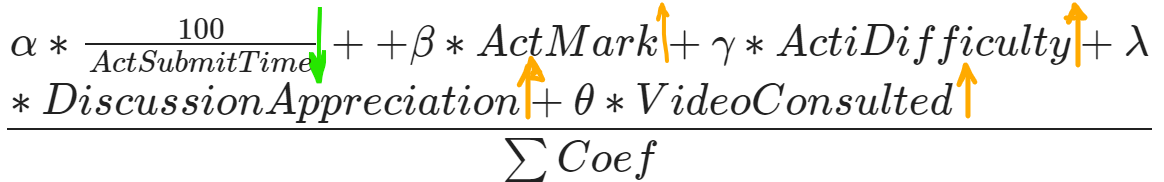

>  $$\huge  \log(\frac{MaxTime}{SubmitTime}+Nb_cp*ActDiff)*\frac{ActMark^2}{Max_Mark} $$

-  We have to penalize  all those students who send their homework late. 


In [ ]:
df_.keys()

Index(['birth_year', 'birth_month', 'school', 'grade', 'gender', 'governorate',
       'Course_code', 'Quiz_count', 'Quiz_Avg_cp', 'Quiz_Avg_mark',
       'Quiz_Avg_diff', 'Quiz_Avg_subm_time', 'Passed_Quizz',
       'Assignment_count', 'Assignment_Avg_cp', 'Asg_Avg_mark', 'Asg_Avg_diff',
       'Asg_Avg_subm_time', 'course_lastyear_mark', 'video_sec', 'nb_video',
       'nb_download', 'nb_discus_participate', 'Label'],
      dtype='object')

In [ ]:
def  score( tab: DataFrame):
  return  tb_score

In [ ]:
a=[1,3.4, 0, 8]
np.log1p(a)


array([0.69314718, 1.48160454, 0.        , 2.19722458])

In [ ]:
df_[["Quiz_Avg_subm_time","Quiz_Avg_mark" ]].head()

,Quiz_Avg_subm_time,Quiz_Avg_mark
782,769,0
78,292,7
28,551,4
861,130,8
582,697,1


In [ ]:
df_[["Quiz_Avg_subm_time","Quiz_Avg_mark" ]].apply( lambda x : x*2)

,Quiz_Avg_subm_time,Quiz_Avg_mark
782,1538,0
78,584,14
28,1102,8
861,260,16
582,1394,2
...,...,...
411,144,8
681,1094,0
76,1626,0
518,138,10


In [ ]:
import numpy as np
? np.exp

In [ ]:
df_= X_train.assign( Label=cls_label)

$\large   e^{-x}  \text { Or  }     
\frac{100}{e^{x}}$

In [ ]:
df_["Ranking"]=100*np.exp(-df_.Quiz_Avg_subm_time) + 10*df_.Quiz_Avg_mark + np.exp(df_.Quiz_Avg_diff)+df_.nb_discus_participate + df_.nb_video+.001*df_.video_sec/60

In [ ]:
df_.head()

,birth_year,birth_month,school,grade,gender,governorate,Course_code,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Label,Raking,Ranking
782,7,6,Sc_9,8,F,Caiptal,g8_1,7,1,0,2,769,0,1,0,2,3,80,2232,3,2,7,1,16.492078,17.426256
78,7,11,Sc_1,8,M,Muharraq,g8_5,10,1,7,2,292,2,1,8,3,4,67,3365,12,5,5,1,32.049932,94.445139
28,7,1,Sc_3,8,M,South,g8_5,10,1,4,3,551,2,2,3,4,3,93,1019,0,4,13,0,24.381976,73.102520
861,7,3,Sc_9,8,M,Caiptal,g8_1,7,1,8,4,130,0,2,1,3,3,79,843,7,19,14,4,39.381462,155.612200
582,7,8,Sc_7,8,F,South,g8_5,10,2,1,4,697,2,1,2,3,3,70,2690,19,18,20,4,50.976944,103.642983


In [ ]:
df_[["Quiz_Avg_mark", "Label", "Ranking"]].groupby("Label").Quiz_Avg_mark.agg(["std", "min", "max", "median", "mean"])

,std,min,max,median,mean
Label,,,,,
0,2.811880,0,9,4,4.360000
1,2.931977,0,9,2,3.473684
2,2.539743,0,9,7,6.315789
3,1.884776,0,6,3,2.866667
4,2.608492,0,8,5,4.285714


In [ ]:
pd.DataFrame(l_score).sort_values("value", ascending=False).head(10)

,feature,value
7,Assignment_count,0.302942
6,Quiz_Avg_subm_time,0.298621
8,Assignment_Avg_cp,0.277709
12,course_lastyear_mark,0.230586
16,nb_discus_participate,0.225850
10,Asg_Avg_diff,0.137487
9,Asg_Avg_mark,0.130910
11,Asg_Avg_subm_time,0.111025
0,birth_year,0.088397
1,birth_month,0.083697


- Student who got a difficult Assignement or Quizz and answers in shortest time possibel is a dinsinguished student. 


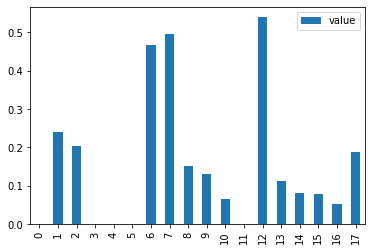

In [ ]:
pd.DataFrame(l_score).plot(kind="bar")
x

In [ ]:
# if  birth_year variation is meaningless, then we can get rid of it. 

In [ ]:
df_[df_.grade=="3"].describe()

,birth_year,birth_month,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Label
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.0,6.958333,8.250000,1.500000,4.750000,3.083333,354.041667,6.458333,1.375000,4.333333,2.62500,3.541667,83.541667,1917.416667,9.416667,9.583333,12.750000,1.791667
std,0.0,3.457558,2.026992,0.510754,2.738613,0.974308,229.552017,2.431303,0.494535,3.225802,1.13492,0.508977,12.201137,1104.945716,6.254853,6.220000,8.699075,1.473805
min,12.0,1.000000,5.000000,1.000000,0.000000,1.000000,44.000000,3.000000,1.000000,0.000000,1.00000,3.000000,61.000000,99.000000,0.000000,0.000000,0.000000,0.000000
25%,12.0,4.000000,7.000000,1.000000,2.000000,2.750000,159.250000,4.000000,1.000000,1.750000,2.00000,3.000000,73.250000,1257.750000,4.000000,3.750000,6.250000,0.000000
50%,12.0,6.000000,9.000000,1.500000,5.000000,3.000000,327.500000,7.500000,1.000000,4.000000,3.00000,4.000000,86.500000,2174.000000,11.000000,11.500000,13.500000,2.000000
75%,12.0,10.000000,10.000000,2.000000,7.250000,4.000000,503.250000,9.000000,2.000000,7.000000,4.00000,4.000000,94.250000,2611.500000,15.000000,14.250000,19.000000,3.000000
max,12.0,12.000000,10.000000,2.000000,9.000000,4.000000,788.000000,9.000000,2.000000,9.000000,4.00000,4.000000,99.000000,3525.000000,18.000000,19.000000,29.000000,4.000000


In [ ]:
df_.groupby("grade").agg(["std", "min", "max"])

birth_year         birth_month      ... nb_discus_participate         Label        
             std min max         std min  ...                   min max       std min max
grade                                     ...                                            
1            0.0  14  14    4.032832   2  ...                     2  27  1.491735   0   4
2            0.0  13  13    1.691240   2  ...                     3  29  1.697749   0   4
3            0.0  12  12    3.457558   1  ...                     0  29  1.473805   0   4
4            0.0  11  11    3.334314   2  ...                     2  28  1.286239   0   4
5            0.0  10  10    2.914915   1  ...                     3  26  1.604732   0   4
6            0.0   9   9    3.751363   1  ...                     0  26  1.009050   1   4
7            0.0   8   8    2.964793   2  ...                     0  25  1.115049   0   4
8            0.0   7   7    3.001754   4  ...                     1  28  1.099043   0   4
9            0.0   6   6    3.210560   2  ...                     6  29  0.630425   1   3

[9 rows x 54 columns]

Feature 0: 0.259361
Feature 1: 0.046807
Feature 2: 0.012697
Feature 3: 0.242109
Feature 4: 0.000000
Feature 5: 0.008122
Feature 6: 0.368499
Feature 7: 0.134252
Feature 8: 0.118757
Feature 9: 0.000000
Feature 10: 0.047316
Feature 11: 0.141463
Feature 12: 0.180878
Feature 13: 0.068314
Feature 14: 0.102949
Feature 15: 0.162320
Feature 16: 0.070806
Feature 17: 0.000000
Feature 18: 0.331904
Feature 19: 0.030680
Feature 20: 0.038502
Feature 21: 0.000000


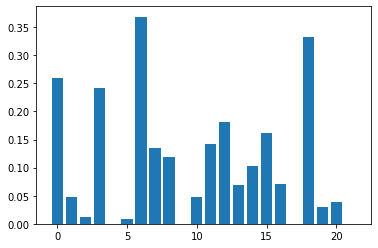

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 881 to 1126
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   birth_year             1044 non-null   category
 1   birth_month            1044 non-null   category
 2   school                 1044 non-null   category
 3   grade                  1044 non-null   category
 4   gender                 1044 non-null   category
 5   governorate            1044 non-null   category
 6   Course_code            1044 non-null   category
 7   Quiz_count             1044 non-null   int64   
 8   Quiz_Avg_cp            1044 non-null   int64   
 9   Quiz_Avg_mark          1044 non-null   int64   
 10  Quiz_Avg_diff          1044 non-null   int64   
 11  Quiz_Avg_subm_time     1044 non-null   int64   
 12  Assignment_count       1044 non-null   int64   
 13  Assignment_Avg_cp      1044 non-null   int64   
 14  Asg_Avg_mark           1044 non-null  

In [ ]:
df_[df_.grade=="3"].select_dtypes("number").groupby("Label").agg(["min", "max", "mean", "std", "count"])

birth_year                ... nb_discus_participate                           
             min max mean  std  ...                   max       mean       std count
Label                           ...                                                 
0             12  12   12  0.0  ...                    29  16.250000  9.035644     8
2             12  12   12  0.0  ...                    25  13.444444  7.796010     9
3             12  12   12  0.0  ...                    17   8.000000  8.544004     3
4             12  12   12  0.0  ...                    21   7.750000  9.429563     4

[4 rows x 85 columns]

In [ ]:
df_=df_.select_dtypes("number")

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 881 to 1126
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Quiz_count             1044 non-null   int64
 1   Quiz_Avg_cp            1044 non-null   int64
 2   Quiz_Avg_mark          1044 non-null   int64
 3   Quiz_Avg_diff          1044 non-null   int64
 4   Quiz_Avg_subm_time     1044 non-null   int64
 5   Assignment_count       1044 non-null   int64
 6   Assignment_Avg_cp      1044 non-null   int64
 7   Asg_Avg_mark           1044 non-null   int64
 8   Asg_Avg_diff           1044 non-null   int64
 9   Asg_Avg_subm_time      1044 non-null   int64
 10  course_lastyear_mark   1044 non-null   int64
 11  video_sec              1044 non-null   int64
 12  nb_video               1044 non-null   int64
 13  nb_download            1044 non-null   int64
 14  nb_discus_participate  1044 non-null   int64
 15  Label                  1044 non-null

In [ ]:
from sklearn.linear_model import   LassoCV 
X= df_.drop("Label", axis=1)
y= df_.Label
reg = LassoCV( )
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.179862
Best score using built-in LassoCV: 0.418055


In [ ]:
coef[np.abs(coef)>0]

Quiz_count               0.124959
Assignment_count         0.041954
course_lastyear_mark    -0.018029
video_sec               -0.000149
nb_video                -0.051247
nb_download             -0.066813
nb_discus_participate    0.033229
dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 8 variables


In [ ]:
# Sorting by importance
import  numpy as np
np.abs(coef).sort_values(ascending=False)

Quiz_count               0.124959
nb_download              0.066813
nb_video                 0.051247
Assignment_count         0.041954
nb_discus_participate    0.033229
course_lastyear_mark     0.018029
video_sec                0.000149
Asg_Avg_subm_time        0.000000
Asg_Avg_diff             0.000000
Asg_Avg_mark             0.000000
Assignment_Avg_cp        0.000000
Quiz_Avg_subm_time       0.000000
Quiz_Avg_diff            0.000000
Quiz_Avg_mark            0.000000
Quiz_Avg_cp              0.000000
dtype: float64

## $$\ \text{  Student Classification based on his Portal's achievements 
 -- Write a function that classifies students.   }$$
 -   Scores will be genereated at songle records related to Acitivities > 
 - fro the sake of convenience, we ll generate Score data  within df_
 


## $$\ \text{  Extra
  }$$

In [ ]:
df_test =pd.DataFrame([{
    "Student_ID": 12090,
    "last_year_Mark":78,
    "Subject_id":"Math101",
    "Achievement": 18,  # feature engineering  Assignment, Quizzes  +.......
    "Mid_term":17,
    "Final_term": 47
}])
#  We can take previous years  achievement and Run a prediction Model 
# if (df_test.Mid_term.isna()):
#   print("  Predict Final")

In [ ]:
df_test.Mid_term.isna()


0    False
Name: Mid_term, dtype: bool

- When we develop the Model, we went through available dataset.  the Prtediction should take into account the set of features within tehe test set  ( X_text)
- Starting from Mid_term we can start  predicting .   Final_exam term ,  Calssification . 


## Activities Data  Time Series

In [17]:
! pip install     randomtimestamp

In [19]:
f"Act_{10*int(np.random.rand(1)+1)}"

'Act_10'

In [20]:
course_ref["g8_1"]

{'0': 7, '1': 3}

In [21]:
from randomtimestamp import randomtimestamp
list=[]
for i, k  in zip(df_st.student_ID, df_st.grade):
  for j in range (1, int((20*np.random.rand()+8))):
    course_id=random.choice(["g"+str(k)+"_"+str(l) for l in range(1,7)])
    ActType=random.choice(["1", "0" ])
    activities= {
        "student_ID": i ,
        "Course_code":course_id,  
        "Activity_id": f"{course_id}-Act_{int(20*np.random.rand()+1)}",
        "Activity_type":ActType,
        # "Act_count": course_ref[course_id][ActType] , #np.random.randint(5,30),

      "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
      "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
      "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
      # "Competence-id":  random.choice([ "Cp_"+str(k) for k in range(10)]), 
      "Act_diff":  int((4*np.random.rand(1)+1)),
      "Act_cp": int((np.random.rand(1)*2+1)), 

      "Act_time": int((270*np.random.rand(1)+30)) ,
      "Act_submit_Time": randomtimestamp(start_year=2020),
      #  add  afeature for  late submission
      "Act_mark": int((1000*np.random.rand()))/100,
    }
    list.append(activities)
df_avt=pd.DataFrame(list)

In [22]:
df_avt.shape

(8024, 12)

In [23]:
df_avt.drop_duplicates(subset=["student_ID",  "Activity_id"], keep="last" , inplace=True)

In [24]:
df_avt.keys()

Index(['student_ID', 'Course_code', 'Activity_id', 'Activity_type', 'Unit_id',
       'Chapter_id', 'Lesson_id', 'Act_diff', 'Act_cp', 'Act_time',
       'Act_submit_Time', 'Act_mark'],
      dtype='object')

In [28]:
df_avt[["student_ID", "Activity_id"]].groupby("student_ID").agg(["count"])

,Activity_id
,count
student_ID,
060121779,24
060127985,18
060129065,11
060144941,16
060147493,15
...,...
141198508,21
141198722,9


In [32]:
pd.pivot_table(df_avt, index=["Course_code", "Activity_type"], values="Activity_id", 
               aggfunc= lambda x :  x.nunique()).sample(10)

,,Activity_id
Course_code,Activity_type,
g2_3,0,19
g2_5,0,19
g5_1,1,20
g1_6,0,20
g2_3,1,19
g1_5,0,20
g5_1,0,19
g8_1,1,20
g3_3,0,20


In [33]:
df_avt.sample(5)

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
7266,080226345,g7_4,g7_4-Act_8,1,Un_0,Chp_9,Ls_3,1,2,207,17-04-2021 02:20:35,6.71
5584,100115902,g5_3,g5_3-Act_20,1,Un_7,Chp_9,Ls_4,3,1,219,16-04-2021 17:41:24,8.64
4316,140967438,g1_5,g1_5-Act_11,1,Un_8,Chp_0,Ls_1,1,2,156,10-02-2021 04:52:47,8.06
1804,090935607,g6_5,g6_5-Act_16,0,Un_8,Chp_8,Ls_5,4,2,276,15-02-2020 03:27:37,2.91
5920,060785915,g9_5,g9_5-Act_11,1,Un_6,Chp_4,Ls_3,2,2,164,26-01-2020 21:29:03,9.22


In [34]:
df_avt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7470 entries, 0 to 8023
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_ID       7470 non-null   object 
 1   Course_code      7470 non-null   object 
 2   Activity_id      7470 non-null   object 
 3   Activity_type    7470 non-null   object 
 4   Unit_id          7470 non-null   object 
 5   Chapter_id       7470 non-null   object 
 6   Lesson_id        7470 non-null   object 
 7   Act_diff         7470 non-null   int64  
 8   Act_cp           7470 non-null   int64  
 9   Act_time         7470 non-null   int64  
 10  Act_submit_Time  7470 non-null   object 
 11  Act_mark         7470 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.1+ MB


##   Achivements Reports

In [35]:
df_avt.index=pd.to_datetime(df_avt.Act_submit_Time)

In [36]:
y_Qz= df_avt[df_avt.Activity_type=="0"].Act_mark.resample("M").mean()
y_Asg= df_avt[df_avt.Activity_type=="1"].Act_mark.resample("M").mean()

In [37]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

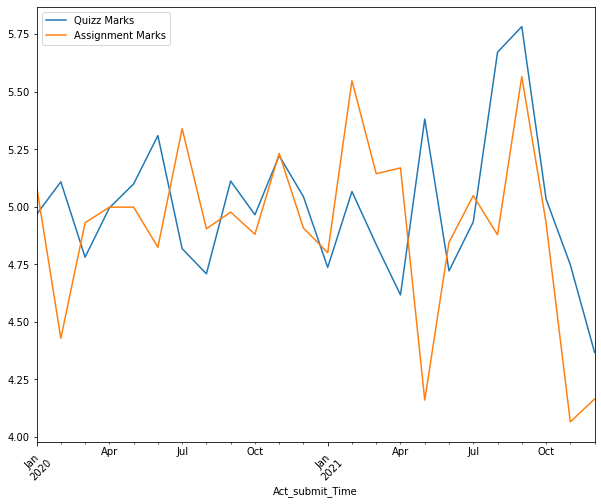

In [40]:
y_Qz.plot(figsize=(10 ,8 ), label="Quizz Marks")
y_Asg.plot(figsize=(10,8), label="Assignment Marks")
plt.xticks(rotation="45")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

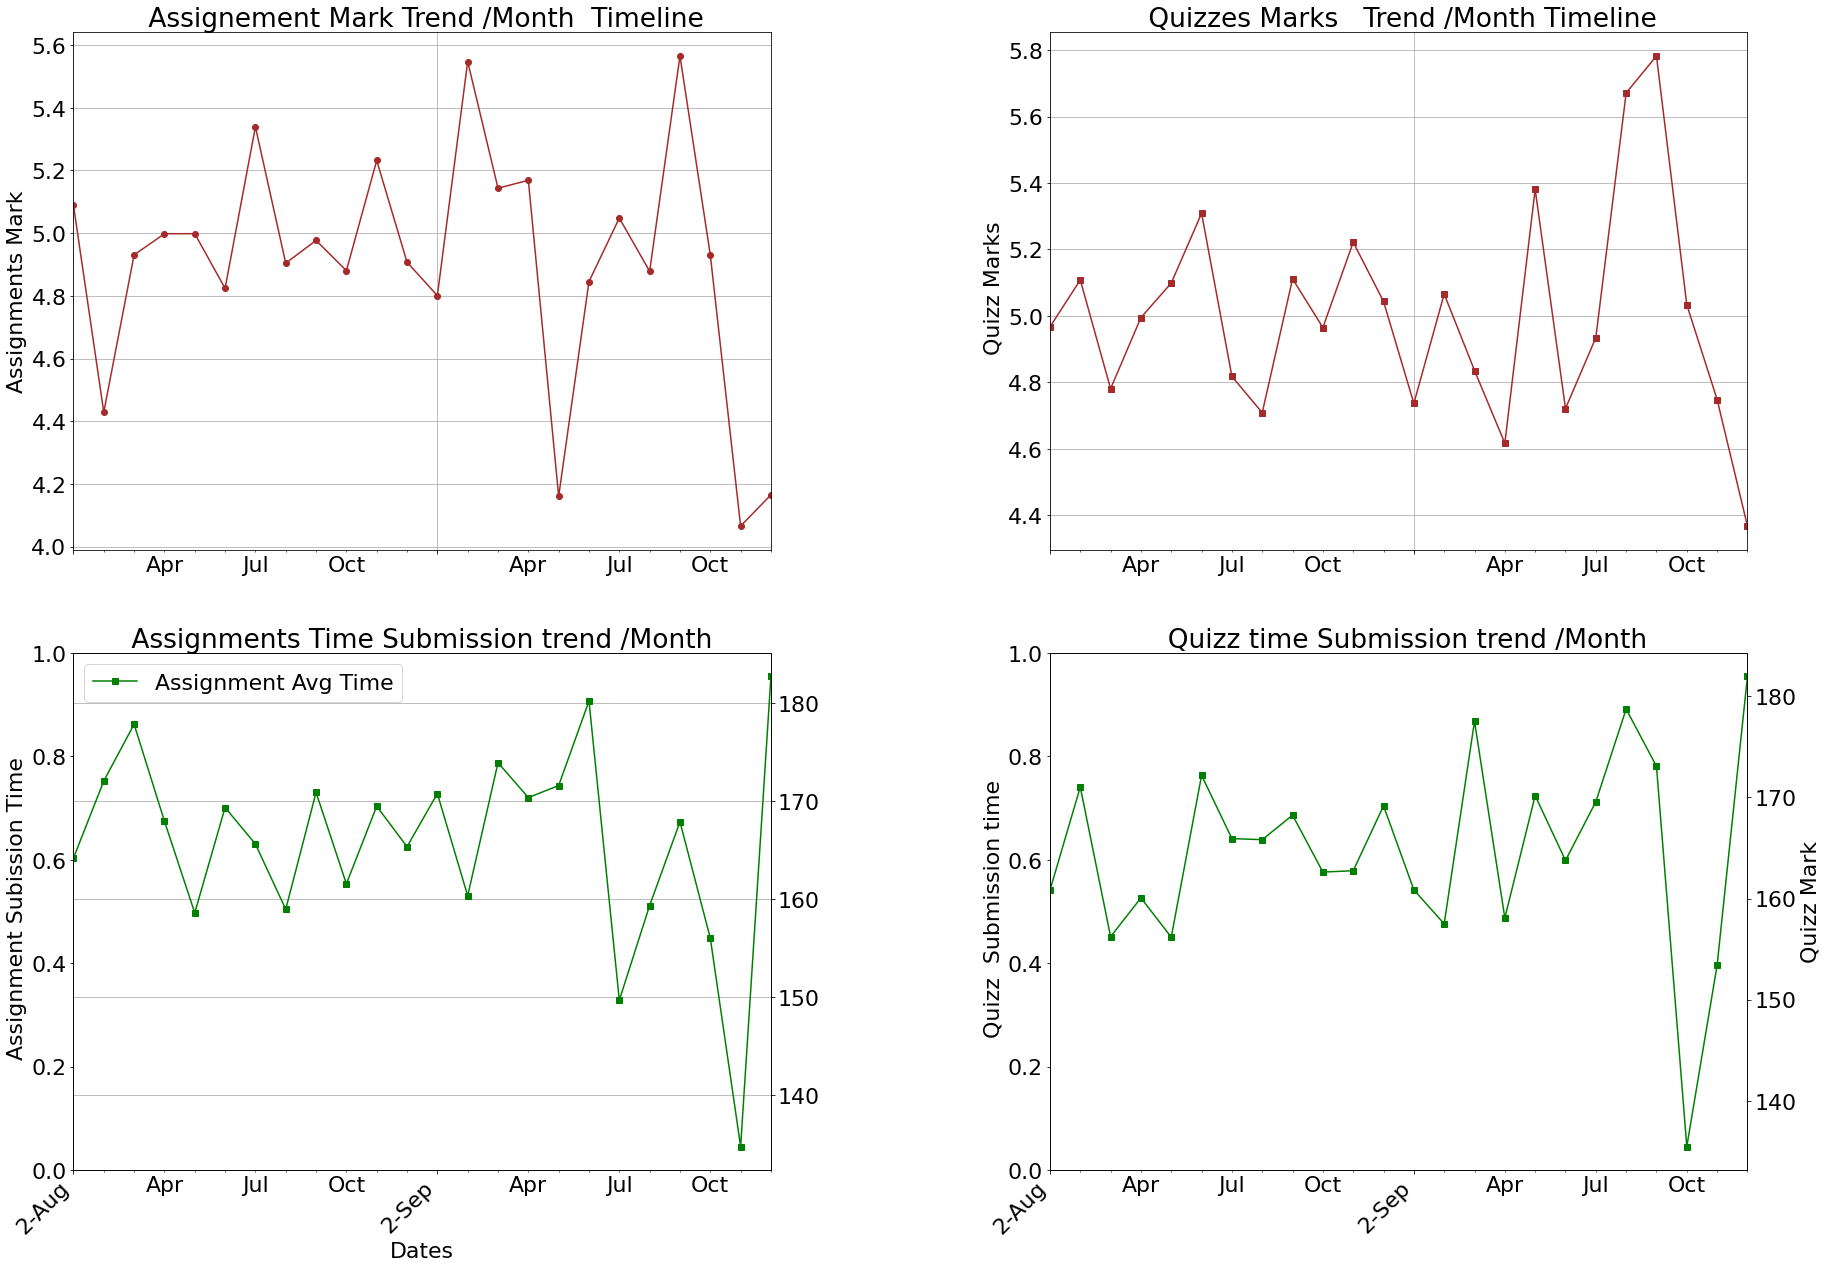

In [41]:
#  NUmber of Assignments is less then Quizzes
plt.rcParams.update({'font.size': 22})
plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

fig, ax=plt.subplots(2, 2, figsize=(30,20) )
plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

df_avt[df_avt.Activity_type=="1"].Act_mark.resample("M").mean().plot( subplots=True,marker="o",    ax=ax[0, 0] , color="brown", label="Assignement trend/Month")
# df_avt[df_avt.Activity_type=="0"].Act_mark.resample("M").mean().plot( subplots=True, marker="s",   ax=ax[0,0] , color="green", label="Average Quizz Marks" )

df_avt[df_avt.Activity_type=="0"].Act_mark.resample("M").mean().plot( subplots=True, marker="s",   ax=ax[0,1] , color="brown", label="Quizz Marks trend/Month" )
# df_plt[df_plt.Activity_type==0]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="green", label="Average Quizz Marks" )
# add time Avg per Activity

ax4=ax[1,1].twinx()
df_avt[df_avt.Activity_type=="1"].Act_time.resample("M").mean().plot( subplots=True, marker="s",   ax=ax4 , color="green", label="Quizz Avg Time" )

# df_plt[df_plt.Activity_type==0]["Act_time_avg"].plot( subplots=True, marker="+",   ax=ax[1,1] , color="brown", label="Average time" )


ax3=ax[1,0].twinx()
df_avt[df_avt.Activity_type=="0"].Act_time.resample("M").mean().plot( subplots=True, marker="s",   ax=ax3 , color="green", label="Assignment Avg Time" )
# df_plt[df_plt.Activity_type==1]["Act_time_avg"].plot( subplots=True,marker="o",    ax=ax[1, 0] , color="blue", label="Assignement Submission Avg time")



plt.legend( loc="upper left")
# Set title and labels for axes
ax[0,0].set(xlabel="Dates",
       ylabel="Assignments Mark",
       title=" Assignement Mark Trend /Month  Timeline")
fig.autofmt_xdate(rotation=45)

plt.grid()
ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

ax[0,1].set(xlabel="Dates",
       ylabel=" Quizz Marks",
       title=" Quizzes Marks   Trend /Month Timeline")
ax4.set(
       ylabel="   Quizz Mark",
       )
ax[1,1].set(
       ylabel="  Quizz  Submission time ",
       title= "  Quizz time Submission trend /Month"
       
       )
ax[1,0].set(xlabel="Dates",
       ylabel=" Assignment Subission Time",
       title=" Assignments Time Submission trend /Month ")

fig.autofmt_xdate(rotation=45)

ax[0,0].grid()
# ax[1,0].grid()
ax[0,1].grid()
ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

In [42]:
df_avt.sample(3)

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2021-02-21 11:26:59,110500707,g4_6,g4_6-Act_7,1,Un_9,Chp_7,Ls_7,4,2,76,21-02-2021 11:26:59,4.74
2021-02-13 09:29:10,110964986,g4_6,g4_6-Act_18,0,Un_0,Chp_8,Ls_0,2,2,160,13-02-2021 09:29:10,6.63
2020-02-20 18:50:55,090679318,g6_1,g6_1-Act_2,1,Un_1,Chp_0,Ls_6,3,1,93,20-02-2020 18:50:55,4.83


## ARIMA

In [47]:
! pip install statsmodels

In [49]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def dataPerCourse( sbj, QA):
  return df_avt[(df_avt.Activity_type==QA) & (df_avt.Course_code==sbj)].Act_mark.resample("w").mean()

In [ ]:
y_Qz= dataPerCourse("g4_4", "0")

In [ ]:
y_Qz=pd.DataFrame(y_Qz)

In [ ]:
y_Qz.head()

,Act_mark
Act_submit_Time,
2020-01-05,3.800
2020-01-12,NaN
2020-01-19,7.880
2020-01-26,2.125
2020-02-02,NaN


In [ ]:
y_Qz.cumsum( axis=0).head()

,Act_mark
Act_submit_Time,
2020-01-05,3.800
2020-01-12,NaN
2020-01-19,11.680
2020-01-26,13.805
2020-02-02,NaN


In [ ]:
#  Stationarity
rolmean = y_Qz.rolling(window=7).mean()
rolstd = y_Qz.rolling(window=7).std()


In [ ]:
rolmean.head(20)

Act_submit_Time
2020-01-04   NaN
2020-01-05   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
2020-01-09   NaN
2020-01-10   NaN
2020-01-11   NaN
2020-01-12   NaN
2020-01-13   NaN
2020-01-14   NaN
2020-01-15   NaN
2020-01-16   NaN
2020-01-17   NaN
2020-01-18   NaN
2020-01-19   NaN
2020-01-20   NaN
2020-01-21   NaN
2020-01-22   NaN
2020-01-23   NaN
Freq: D, Name: Act_mark, dtype: float64

In [ ]:
rolstd.head()

Act_submit_Time
2020-01-04   NaN
2020-01-05   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
Freq: D, Name: Act_mark, dtype: float64

In [43]:
y_Qz= df_avt[df_avt.Activity_type=="0"].Act_mark.resample("M").mean()
y_Asg= df_avt[df_avt.Activity_type=="1"].Act_mark.resample("M").mean()

In [44]:
y_Asg.head()

Act_submit_Time
2020-01-31    5.089496
2020-02-29    4.428814
2020-03-31    4.930670
2020-04-30    4.998122
2020-05-31    4.998354
Freq: M, Name: Act_mark, dtype: float64

In [45]:
from pylab import rcParams
rcParams['figure.figsize']=18,8

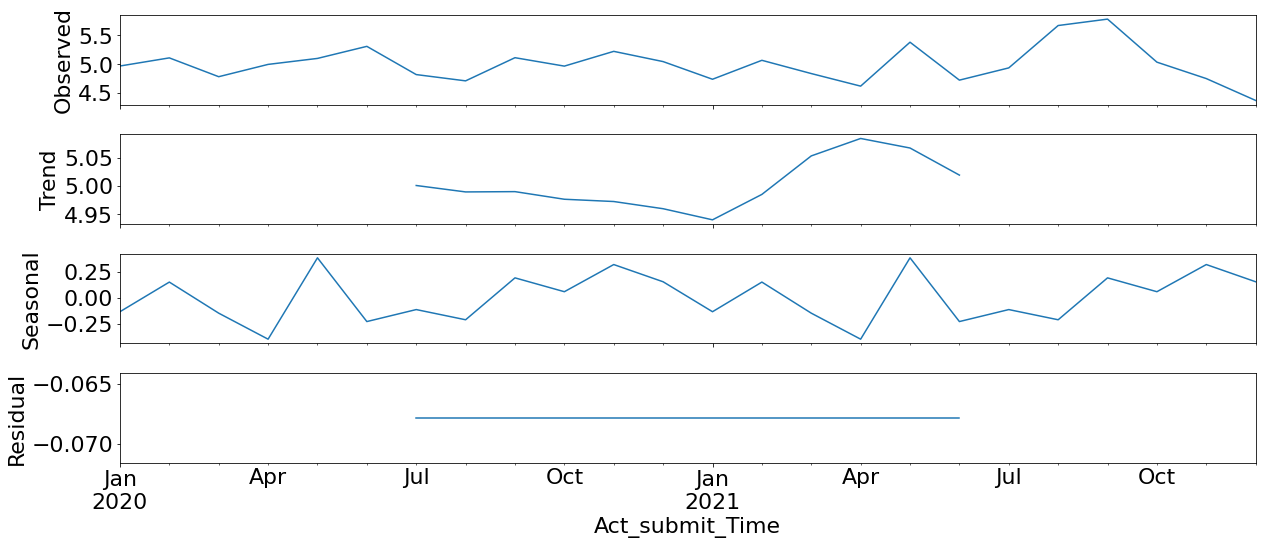

In [50]:
decomposition= sm.tsa.seasonal_decompose(y_Qz, model="additive")
fig=decomposition.plot()
plt.show()
#

- ACFs and PACFs help researchers understand the temporal dynamics of an 
individual time series. 

In [ ]:
mod =sm.tsa.statespace.SARIMAX( y_Qz, 
                               order=(1,1,1), 
                               seasonal_order=(1,1,0,12),
                               enforce_stationarity=False, 
                               enforce_invertibility=False
                               )


In [51]:
! pip install prophet 

     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 184kB 21.8MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6640250 sha256=8bee019585ae862c92c4d54713a8051c4f6f4a6722240c11480011bf07f0e42a
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


## Prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-10-16 15:56:49,080469979,g7_2,g7_2-Act_10,1,Un_2,Chp_3,Ls_5,1,2,292,16-10-2020 15:56:49,6.01
2020-07-17 20:05:03,080469979,g7_6,g7_6-Act_3,0,Un_3,Chp_4,Ls_7,2,2,190,17-07-2020 20:05:03,3.67
2020-09-13 18:49:27,080469979,g7_6,g7_6-Act_2,0,Un_3,Chp_9,Ls_7,2,1,174,13-09-2020 18:49:27,6.26
2020-01-01 17:10:55,080469979,g7_6,g7_6-Act_13,1,Un_3,Chp_1,Ls_8,3,2,161,01-01-2020 17:10:55,3.09
2020-07-07 19:20:43,080469979,g7_2,g7_2-Act_8,1,Un_6,Chp_4,Ls_1,3,2,244,07-07-2020 19:20:43,4.97


In [ ]:
QzMkFcast=pd.DataFrame(df_avt[df_avt.Activity_type=="0"].Act_mark.resample("w").mean()).reset_index()

In [ ]:
QzMkFcast.columns = ['ds', 'y']

In [ ]:
QzMkFcast.tail()

,ds,y
96,2021-11-07,4.438000
97,2021-11-14,NaN
98,2021-11-21,NaN
99,2021-11-28,NaN
100,2021-12-05,4.931818


In [ ]:
# QzMkFcast["ds"] =pd.to_datetime(QzMkFcast['ds'])

In [ ]:
model = Prophet( )
model.fit(QzMkFcast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=2)
forecast = model.predict(future)

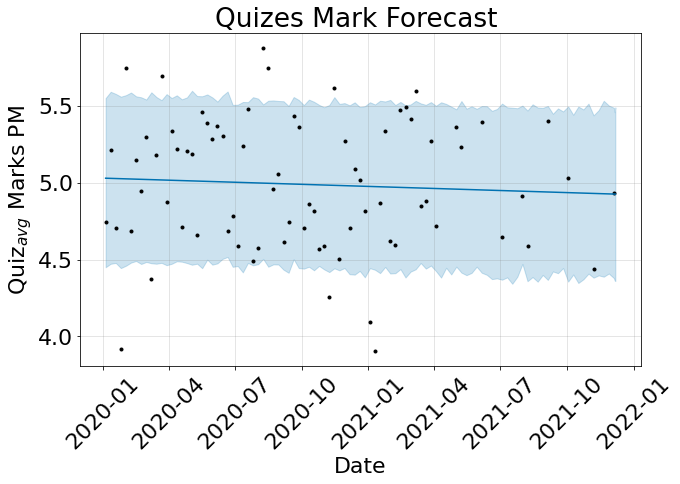

In [ ]:
fig = model.plot(forecast, xlabel='Date', 
                 ylabel=r'Quiz$_{avg}$ Marks PM')
plt.title( "Quizes Mark Forecast ")
plt.xticks(rotation="45")
plt.show()

In [ ]:
forecast.head(3).T

,0,1,2
ds,2020-01-05 00:00:00,2020-01-12 00:00:00,2020-01-19 00:00:00
trend,5.02851,5.02748,5.02645
yhat_lower,4.4496,4.47222,4.47786
yhat_upper,5.54896,5.5903,5.57649
trend_lower,5.02851,5.02748,5.02645
trend_upper,5.02851,5.02748,5.02645
additive_terms,0,0,0
additive_terms_lower,0,0,0
additive_terms_upper,0,0,0
multiplicative_terms,0,0,0


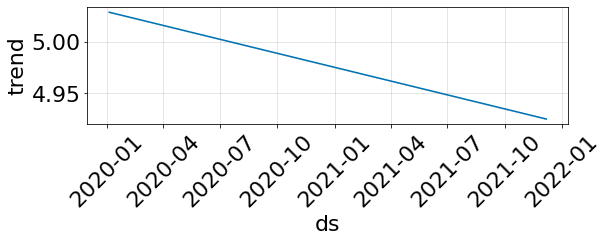

In [ ]:
fig2 = model.plot_components(forecast)
plt.xticks(rotation="45")

plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


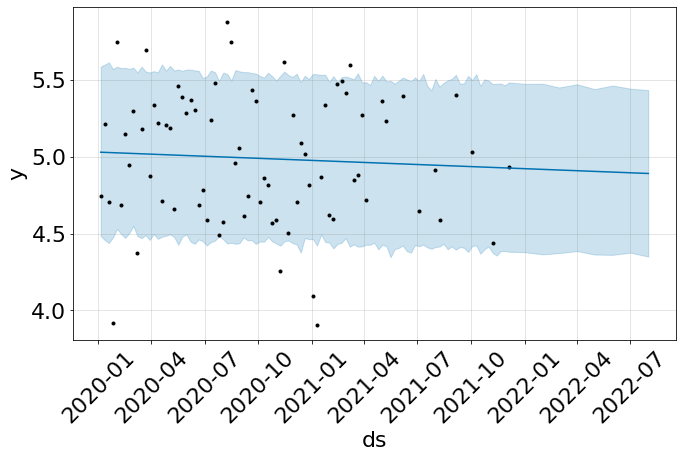

In [ ]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(QzMkFcast)
future = model.make_future_dataframe(periods=8,
                                     freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.xticks(rotation="45")

plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


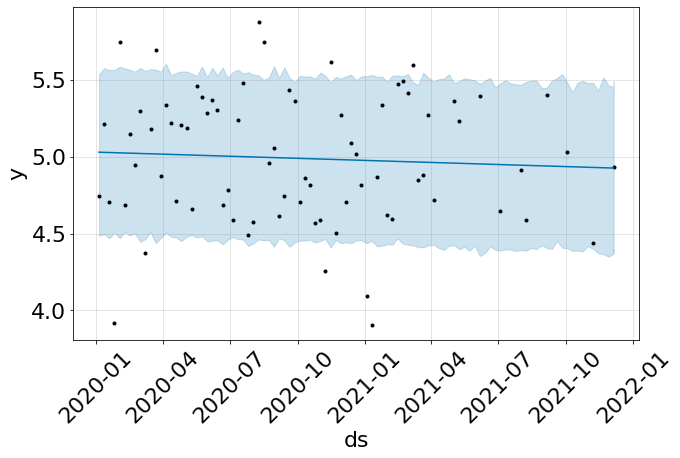

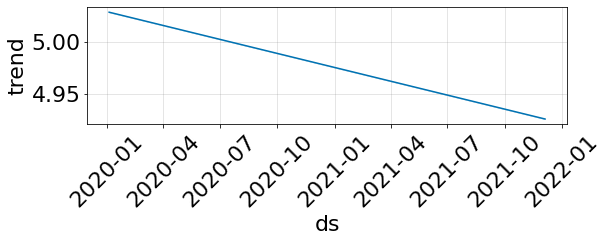

In [ ]:

QzMkFcast=pd.DataFrame(df_avt[df_avt.Activity_type=="0"].Act_mark.resample("w").mean()).reset_index()
QzMkFcast.columns = ['ds', 'y']
model = Prophet(seasonality_mode='multiplicative')
model.fit(QzMkFcast)
future = model.make_future_dataframe(periods=2,
                                     freq='h')

forecast = model.predict(future)
fig = model.plot(forecast)
plt.xticks(rotation="45")

plt.show()
fig2 = model.plot_components(forecast)
plt.xticks(rotation="45")

plt.show()

##  Data Preparation

In [52]:
df_avt[(df_avt.Course_code=="g6_2")]["Activity_id"].nunique()

20

In [53]:
df_avt[(df_avt.Course_code=="g9_1") & (df_avt.Activity_type=="0")]["Activity_id"].value_counts()

g9_1-Act_20    9
g9_1-Act_9     8
g9_1-Act_15    8
g9_1-Act_1     6
g9_1-Act_18    5
g9_1-Act_19    5
g9_1-Act_12    5
g9_1-Act_17    5
g9_1-Act_13    5
g9_1-Act_16    4
g9_1-Act_11    4
g9_1-Act_2     4
g9_1-Act_10    4
g9_1-Act_8     3
g9_1-Act_3     3
g9_1-Act_4     2
g9_1-Act_5     2
g9_1-Act_7     2
g9_1-Act_6     1
g9_1-Act_14    1
Name: Activity_id, dtype: int64

In [54]:
df_avt[(df_avt.Course_code=="g1_1") & (df_avt.Activity_type=="0")]["Activity_id"].nunique()

20

In [55]:
pd.pivot_table(df_avt, index=["Course_code", "Activity_type"],values="Activity_id" , 
               aggfunc="count")

Activity_id
Course_code Activity_type             
g1_1        0                       67
            1                       82
g1_2        0                       79
            1                       78
g1_3        0                       81
...                                ...
g9_4        1                       69
g9_5        0                       76
            1                       73
g9_6        0                       91
            1                       69

[108 rows x 1 columns]

In [56]:
df_act_Stat=pd.pivot_table(df_avt, index=["Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp", "Act_time" , "Activity_id"]   , aggfunc={
                   "Act_mark":("mean","max", "count", "min"), 
                   "Act_diff": "mean",
                   "Act_cp": "mean",
                   "Act_time": ("mean", "max", "min"),
                   "Activity_id": lambda x: x.nunique()
               }).rename(columns={
                   "Activity_id" :  "Activities_Count"  #  number of activities
#                 "Act_mark":"Std_act_m", 
#                    "Act_diff": "Std_act_d",
#                    "Act_cp": "Std_act_cp",
#                    "Act_time": "Std_act_t"   

               })
df_act_Stat.head()

Act_cp  Act_diff  ... Act_time Activities_Count
                               mean      mean  ...      min         <lambda>
Course_code Activity_type                      ...                          
g1_1        0              1.462687  2.402985  ...     32.0               20
            1              1.512195  2.597561  ...     33.0               20
g1_2        0              1.518987  2.670886  ...     31.0               20
            1              1.448718  2.551282  ...     30.0               20
g1_3        0              1.518519  2.740741  ...     30.0               20

[5 rows x 10 columns]

In [58]:
df_avt.groupby(["Course_code", "Activity_type"]).agg("count").sample(4)

,,student_ID,Activity_id,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Course_code,Activity_type,,,,,,,,,,
g3_6,1,75,75,75,75,75,75,75,75,75,75
g7_2,0,82,82,82,82,82,82,82,82,82,82
g6_2,0,63,63,63,63,63,63,63,63,63,63
g5_3,1,75,75,75,75,75,75,75,75,75,75


In [59]:
df_act_Stat.columns=[f"{i}_{j}" for  i , j in df_act_Stat.columns]

In [60]:
df_avt[(df_avt.Course_code=="g1_1")&(df_avt.Activity_type=="0")].describe()

,Act_diff,Act_cp,Act_time,Act_mark
count,67.000000,67.000000,67.000000,67.000000
mean,2.402985,1.462687,166.835821,5.143881
std,1.142296,0.502369,79.677113,3.274569
min,1.000000,1.000000,32.000000,0.020000
25%,1.000000,1.000000,97.000000,1.985000
50%,2.000000,1.000000,170.000000,5.590000
75%,3.000000,2.000000,237.500000,8.365000
max,4.000000,2.000000,299.000000,9.940000


### Students' Achievement Statistics

In [61]:
df_std_Stat=pd.pivot_table(df_avt, index=["student_ID","Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp", "Act_time" ]   , aggfunc={
                   "Act_mark":("mean","max", "count", np.std, "last"), 
                   "Act_diff": "mean",
                   "Act_cp": "mean",
                   "Act_time": ("mean", "max", np.std)
               },  fill_value=0 ).rename(columns={
                "Act_mark":"Std_act_m", 
                   "Act_diff": "Std_act_d",
                   "Act_cp": "Std_act_cp",
                   "Act_time": "Std_act_t"   

               })
df_std_Stat.head()

Std_act_cp  ...   Std_act_t
                                           mean  ...         std
student_ID Course_code Activity_type             ...            
060121779  g9_1        0                    2.0  ...    0.000000
           g9_2        1                    1.6  ...  101.035637
           g9_3        0                    1.5  ...  159.806133
                       1                    1.0  ...  151.320851
           g9_4        0                    1.0  ...   52.367293

[5 rows x 10 columns]

In [62]:
df_avt[(df_avt.student_ID=="060121779")& (df_avt.Course_code=="g9_3")]

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-10-10 01:50:37,060121779,g9_3,g9_3-Act_7,0,Un_9,Chp_1,Ls_7,3,2,267,10-10-2020 01:50:37,7.34
2020-08-24 05:59:52,060121779,g9_3,g9_3-Act_4,0,Un_3,Chp_0,Ls_5,3,1,41,24-08-2020 05:59:52,9.43
2020-01-31 04:31:59,060121779,g9_3,g9_3-Act_19,1,Un_5,Chp_8,Ls_1,2,1,79,31-01-2020 04:31:59,8.14
2020-05-02 15:47:30,060121779,g9_3,g9_3-Act_2,1,Un_7,Chp_5,Ls_3,3,1,293,05-02-2020 15:47:30,3.13


In [63]:
df_std_Stat.columns

MultiIndex([('Std_act_cp',  'mean'),
            ( 'Std_act_d',  'mean'),
            ( 'Std_act_m', 'count'),
            ( 'Std_act_m',  'last'),
            ( 'Std_act_m',   'max'),
            ( 'Std_act_m',  'mean'),
            ( 'Std_act_m',   'std'),
            ( 'Std_act_t',   'max'),
            ( 'Std_act_t',  'mean'),
            ( 'Std_act_t',   'std')],
           )

In [64]:
df_std_Stat.columns=[f"{i}_{j}" for  i , j in df_std_Stat.columns]

In [65]:
df_std_Stat.sample(5)

,,,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std
student_ID,Course_code,Activity_type,,,,,,,,,,
120184883,g3_5,0,1.0,4.0,1,9.31,9.31,9.310,0.000000,119,119.0,0.000000
110716425,g4_1,1,2.0,3.0,1,6.39,6.39,6.390,0.000000,201,201.0,0.000000
090302657,g6_4,1,1.4,2.2,5,8.28,9.56,4.906,3.872025,276,187.2,91.414988
100111500,g5_3,0,2.0,2.0,1,3.53,3.53,3.530,0.000000,240,240.0,0.000000
090969765,g6_4,1,2.0,1.0,1,4.73,4.73,4.730,0.000000,142,142.0,0.000000


- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [66]:
df_std_Stat["Act_score"]=np.log1p( 
    df_std_Stat.Std_act_t_max/df_std_Stat.Std_act_t_mean +df_std_Stat.Std_act_d_mean* df_std_Stat.Std_act_cp_mean
)*df_std_Stat["Std_act_m_max"]**2/df_std_Stat.Std_act_m_mean

In [67]:
df_std_Stat.head()

Std_act_cp_mean  ...  Act_score
student_ID Course_code Activity_type                   ...           
060121779  g9_1        0                          2.0  ...  19.779206
           g9_2        1                          1.6  ...  26.329855
           g9_3        0                          1.5  ...  20.985214
                       1                          1.0  ...  19.100397
           g9_4        0                          1.0  ...  15.194955

[5 rows x 11 columns]

In [68]:
df_std_Stat.reset_index(inplace=True)

In [69]:
df_std_Stat.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score
0,060121779,g9_1,0,2.0,4.000000,1,8.59,8.59,8.590000,0.000000,37,37.000000,0.000000,19.779206
1,060121779,g9_2,1,1.6,3.000000,5,4.94,9.62,7.344000,2.407038,296,129.800000,101.035637,26.329855
2,060121779,g9_3,0,1.5,3.000000,2,9.43,9.43,8.385000,1.477853,267,154.000000,159.806133,20.985214
3,060121779,g9_3,1,1.0,2.500000,2,3.13,8.14,5.635000,3.542605,293,186.000000,151.320851,19.100397
4,060121779,g9_4,0,1.0,1.666667,3,6.15,7.84,5.633333,2.505281,226,166.333333,52.367293,15.194955


In [ ]:
df_act_Stat.reset_index(inplace=True)

In [ ]:
df_act_Stat.head()

,Course_code,Activity_type,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
0,g1_1,0,1.471429,2.514286,70,9.98,4.809286,0.08,295.0,163.700000,30.0,19
1,g1_1,1,1.538462,2.371795,78,9.92,5.119103,0.23,298.0,172.179487,31.0,20
2,g1_2,0,1.449275,2.623188,69,9.85,5.242029,0.03,299.0,164.202899,35.0,20
3,g1_2,1,1.468354,2.316456,79,9.78,4.940000,0.00,295.0,166.911392,31.0,20
4,g1_3,0,1.478261,2.521739,69,9.91,5.254493,0.32,298.0,152.159420,31.0,19


In [70]:
df_mg=df_std_Stat.merge(df_act_Stat,  on=["Course_code", "Activity_type"])

In [71]:
df_mg.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
0,060121779,g9_1,0,2.000000,4.000000,1,8.59,8.59,8.59,0.000000,37,37.000000,0.000000,19.779206,1.534884,2.383721,86,9.99,4.915698,0.08,296.0,161.186047,30.0,20
1,060127985,g9_1,0,2.000000,4.000000,1,9.47,9.47,9.47,0.000000,30,30.000000,0.000000,21.805481,1.534884,2.383721,86,9.99,4.915698,0.08,296.0,161.186047,30.0,20
2,060129065,g9_1,0,1.000000,2.000000,1,3.62,3.62,3.62,0.000000,153,153.000000,0.000000,5.018386,1.534884,2.383721,86,9.99,4.915698,0.08,296.0,161.186047,30.0,20
3,060148115,g9_1,0,2.000000,4.000000,1,8.00,8.00,8.00,0.000000,116,116.000000,0.000000,18.420681,1.534884,2.383721,86,9.99,4.915698,0.08,296.0,161.186047,30.0,20
4,060183831,g9_1,0,1.666667,2.666667,3,8.76,8.76,4.16,4.311902,130,92.333333,34.588052,35.502153,1.534884,2.383721,86,9.99,4.915698,0.08,296.0,161.186047,30.0,20


In [72]:
df_mg["last_mark"]=df_mg.Std_act_m_last  # put the target at the end of table
df_mg.drop("Std_act_m_last", axis=1, inplace=True)  #  drop the last mark feature.

In [73]:
df_mg.sample(3)

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
3024,120832091,g3_4,0,2.0,1.0,1,9.07,9.07,0.0,116,116.0,0.0,12.573690,1.558442,2.675325,77,9.91,4.407143,0.19,299.0,179.025974,50.0,19,9.07
2440,110964986,g4_2,0,1.0,4.0,1,2.03,2.03,0.0,222,222.0,0.0,3.637272,1.487179,2.602564,78,9.98,5.457308,0.07,299.0,166.358974,36.0,20,2.03
607,070527258,g8_3,1,1.0,1.0,1,7.89,7.89,0.0,121,121.0,0.0,8.668051,1.458333,2.625000,48,9.97,5.018333,0.03,289.0,167.958333,32.0,17,7.89


In [74]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253 entries, 0 to 4252
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_ID                 4253 non-null   object 
 1   Course_code                4253 non-null   object 
 2   Activity_type              4253 non-null   object 
 3   Std_act_cp_mean            4253 non-null   float64
 4   Std_act_d_mean             4253 non-null   float64
 5   Std_act_m_count            4253 non-null   int64  
 6   Std_act_m_max              4253 non-null   float64
 7   Std_act_m_mean             4253 non-null   float64
 8   Std_act_m_std              4253 non-null   float64
 9   Std_act_t_max              4253 non-null   int64  
 10  Std_act_t_mean             4253 non-null   float64
 11  Std_act_t_std              4253 non-null   float64
 12  Act_score                  4251 non-null   float64
 13  Act_cp_mean                4253 non-null   float

## FbProphet


In [75]:
from fbprophet import Prophet

In [ ]:
# Train the model 
model=Prophet()


## Pipeline  
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
# df_mg.drop("student_ID", axis=1, inplace= True)  # Drop Student_ID
df_mg.set_index("student_ID", inplace=True)

In [ ]:
# Split Data
X=df_mg.iloc[:,:-1]
y=df_mg.iloc[:, -1]

In [ ]:

from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(df[df.grade=="6"], test_size=0.3, random_state=42, shuffle=True)

X_train, X_test, y_train, y_test=train_test_split(X, y  , test_size=.3,   random_state=42)

In [ ]:
X_train.shape, X_test.shape

((3025, 22), (1297, 22))

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     OneHotEncoder(  sparse=False ,handle_unknown = 'ignore'),
    #  OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

(3025, 76)

In [ ]:
#df.select_dtypes(exclude="number").shape

In [ ]:
preprocess.fit_transform(X_train)[0]

array([ 0.02766771, -0.23378694,  2.32359392,  0.91551276, -0.08118901,
        0.82079663,  1.27157349,  0.55628835,  1.40339912,  1.5740772 ,
        0.30543124,  0.37477473,  1.18829778, -0.13271159, -0.83682711,
       -0.00805908,  0.85445052, -0.82104889, -0.89051174,  0.59649984,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
# pipelline Model
from xgboost import XGBRegressor
pipe_reg= make_pipeline(
    preprocess, 
    XGBRegressor(objective="reg:squarederror")
    )

In [ ]:
pipe_reg.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f554252c150>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f554252c190>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'columntransformer__pipeline-1__memory': None,
 'columntransformer__pipeline-1__standardscaler': StandardScaler(),
 'columntransform

In [ ]:
# hyper parameters

param_grid={
    "xgbregressor__learning_rate": [0.01, 0.1],
    "xgbregressor__max_depth" : [3,5,7, 10] ,
    "xgbregressor__min_child_weight" :[1,3,5],
    "xgbregressor__subsample": [0.5, 0.7],
    "xgbregressor__colsample_bytree": [0.5, 0.7],
    "xgbregressor__n_estimators": [200, 400, 1000]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring="neg_mean_squared_error", cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=5, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7; total time=   6.1s
[CV 2/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=5, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7; total time=   6.0s
[CV 3/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=5, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7; total time=   5.9s
[CV 4/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=5, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7; total time=   6.0s
[CV 5/5] END xgbregressor__colsample_by

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f554252c150>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                One...
                                              XGBRegressor(ob

In [ ]:
gs.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5539739990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f553974bed0>)])),
                ('xgbregressor',
                 XGBRegressor(colsample_bytree=0.7, learning_rat

In [ ]:
gs.best_params_

{'xgbregressor__colsample_bytree': 0.7,
 'xgbregressor__learning_rate': 0.01,
 'xgbregressor__max_depth': 5,
 'xgbregressor__min_child_weight': 3,
 'xgbregressor__n_estimators': 400,
 'xgbregressor__subsample': 0.5}

In [ ]:
std_Ahmed=X_test.loc["060218584"]

In [ ]:
gs.predict(std_Ahmed)

array([6.58877  , 7.35642  , 2.3509367, 7.0918016], dtype=float32)

In [ ]:
std_Ahmed["Predicted_mark"]=gs.predict(std_Ahmed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
std_Ahmed

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,Predicted_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060218584,g9_5,1,2.0,1.50,2,9.06,6.6800,3.365828,154,128.50,36.062446,20.254979,1.454545,2.623377,77,9.94,4.861169,0.12,299.0,168.623377,33.0,20,6.588770
060218584,g9_3,0,1.5,2.75,4,9.27,7.4625,1.778096,173,108.25,53.643111,21.943056,1.447368,2.526316,76,9.93,4.858289,0.21,291.0,154.723684,30.0,20,7.356420
060218584,g9_6,0,1.4,2.20,5,9.90,3.2460,3.862425,266,168.00,92.404004,52.356925,1.555556,2.444444,81,9.96,4.575185,0.14,285.0,161.209877,30.0,20,2.350937
060218584,g9_1,1,1.0,3.00,3,9.83,7.0200,3.035836,234,123.00,98.503807,24.437554,1.387500,2.575000,80,9.83,4.736750,0.03,299.0,171.812500,37.0,20,7.091802


In [ ]:
y_pred=gs.predict(X_test)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y_test, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y_test, y_pred):.3f}")

  MAE : 1.024
  MSE : 2.793
  RMSE : 1.671
  R^2 : 0.662
  Explained Variance Score : 1.024


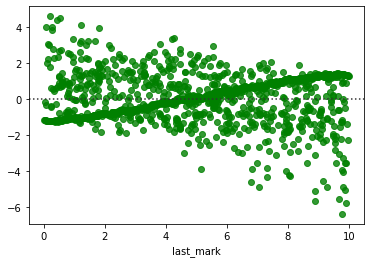

In [ ]:
# Residual Plot
import seaborn as sns
_= sns.residplot(x=y_test, y=y_pred, color="green")

In [ ]:
X_test.shape

(1297, 22)

In [ ]:
X_test.sample()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
student_ID,,,,,,,,,,,,,,,,,,,,,,
110476188,g4_6,0,1.5,2.0,2,3.15,2.435,1.011163,163,116.5,65.760931,6.871341,1.511111,2.311111,45,9.96,5.349778,0.82,291.0,155.088889,35.0,19


In [ ]:
df_avt.sample()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-01-25 06:45:55,080679185,g7_6,g7_6-Act_1,1,Un_8,Chp_2,Ls_1,1,2,143,25-01-2020 06:45:55,1.25


In [ ]:
df_avt.keys()

Index(['student_ID', 'Course_code', 'Activity_id', 'Activity_type', 'Unit_id',
       'Chapter_id', 'Lesson_id', 'Act_diff', 'Act_cp', 'Act_time',
       'Act_submit_Time', 'Act_mark'],
      dtype='object')

In [ ]:
X_test.keys()

Index(['Course_code', 'Activity_type', 'Std_act_cp_mean', 'Std_act_d_mean',
       'Std_act_m_count', 'Std_act_m_max', 'Std_act_m_mean', 'Std_act_m_std',
       'Std_act_t_max', 'Std_act_t_mean', 'Std_act_t_std', 'Act_score',
       'Act_cp_mean', 'Act_diff_mean', 'Act_mark_count', 'Act_mark_max',
       'Act_mark_mean', 'Act_mark_min', 'Act_time_max', 'Act_time_mean',
       'Act_time_min', 'Activities_Count_<lambda>'],
      dtype='object')

In [ ]:
#  Last Mark Comparaison
pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

,Actual Mark,Predicted Mark
student_ID,,
060181024,1.51,1.471063
060624692,2.53,2.495220
090904560,6.72,5.385570
091154374,1.94,1.996226
091285352,0.42,0.576722
060486160,1.86,1.917924


In [ ]:
X_test["predicted_Mark"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,predicted_Mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
080302769,g7_2,0,1.00,1.0,1,0.10,0.1000,0.000000,290,290.0,0.000000,0.109861,1.477612,2.388060,67,9.83,5.137313,0.10,294.0,148.343284,33.0,20,0.347407
071221923,g8_1,0,1.00,4.0,1,5.65,5.6500,0.000000,237,237.0,0.000000,10.123441,1.491228,2.438596,57,9.75,4.866491,0.65,297.0,181.877193,35.0,20,5.539409
080954684,g7_4,0,1.75,1.5,4,7.35,3.0275,2.899682,286,203.5,67.436390,28.826880,1.444444,2.416667,72,9.17,4.563611,0.19,297.0,192.097222,32.0,18,2.634017
131154778,g2_1,0,1.00,3.0,2,9.74,5.9950,5.296230,254,154.5,140.714249,27.385726,1.363636,2.621212,66,9.86,4.648182,0.37,299.0,150.924242,30.0,19,5.739042
101004191,g5_4,0,2.00,1.0,1,6.26,6.2600,0.000000,191,191.0,0.000000,8.678203,1.493671,2.696203,79,9.98,4.833671,0.01,292.0,165.759494,37.0,20,6.075245


## St Graph

In [ ]:
df_mg.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060130111,g9_2,1,2.0,2.0,1,6.94,6.940,0.000000,31,31.0,0.000000,12.434811,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,6.94
060218584,g9_2,1,1.5,2.5,2,3.18,2.355,1.166726,280,274.5,7.778175,7.526023,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,1.53
060234794,g9_2,1,2.0,3.5,2,7.23,6.770,0.650538,219,196.5,31.819805,17.062948,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,6.31
060236572,g9_2,1,2.0,3.0,1,8.13,8.130,0.000000,178,178.0,0.000000,16.905860,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,8.13
060271944,g9_2,1,1.0,2.5,2,6.55,5.555,1.407142,243,168.5,105.358910,12.340147,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,4.56


In [ ]:
df_plt.head()

In [ ]:
std_Ahmed

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,Predicted_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060109224,g9_4,1,1.500000,2.500000,2,6.82,3.730000,4.369920,151,98.0,74.953319,22.933118,1.557377,2.688525,61,9.89,5.327213,0.05,297.0,182.344262,31.0,20,4.503774
060109224,g9_6,1,2.000000,3.000000,1,2.36,2.360000,0.000000,119,119.0,0.000000,4.907482,1.380952,2.412698,63,9.75,5.074762,0.18,289.0,173.873016,38.0,18,2.322908
060109224,g9_6,0,1.333333,2.333333,3,7.20,3.266667,3.425337,266,225.0,37.643060,26.445512,1.557143,2.571429,70,9.71,4.353571,0.08,297.0,180.085714,37.0,20,3.342093
060109224,g9_1,0,1.500000,1.500000,4,9.17,6.272500,3.085907,139,105.0,39.941624,20.381708,1.562500,2.387500,80,9.99,5.153125,0.70,297.0,169.987500,32.0,20,6.496658


In [ ]:
df_plt.merge(std_Ahmed, on=["Course_code", "Activity_type"])

<Figure size 432x288 with 0 Axes>

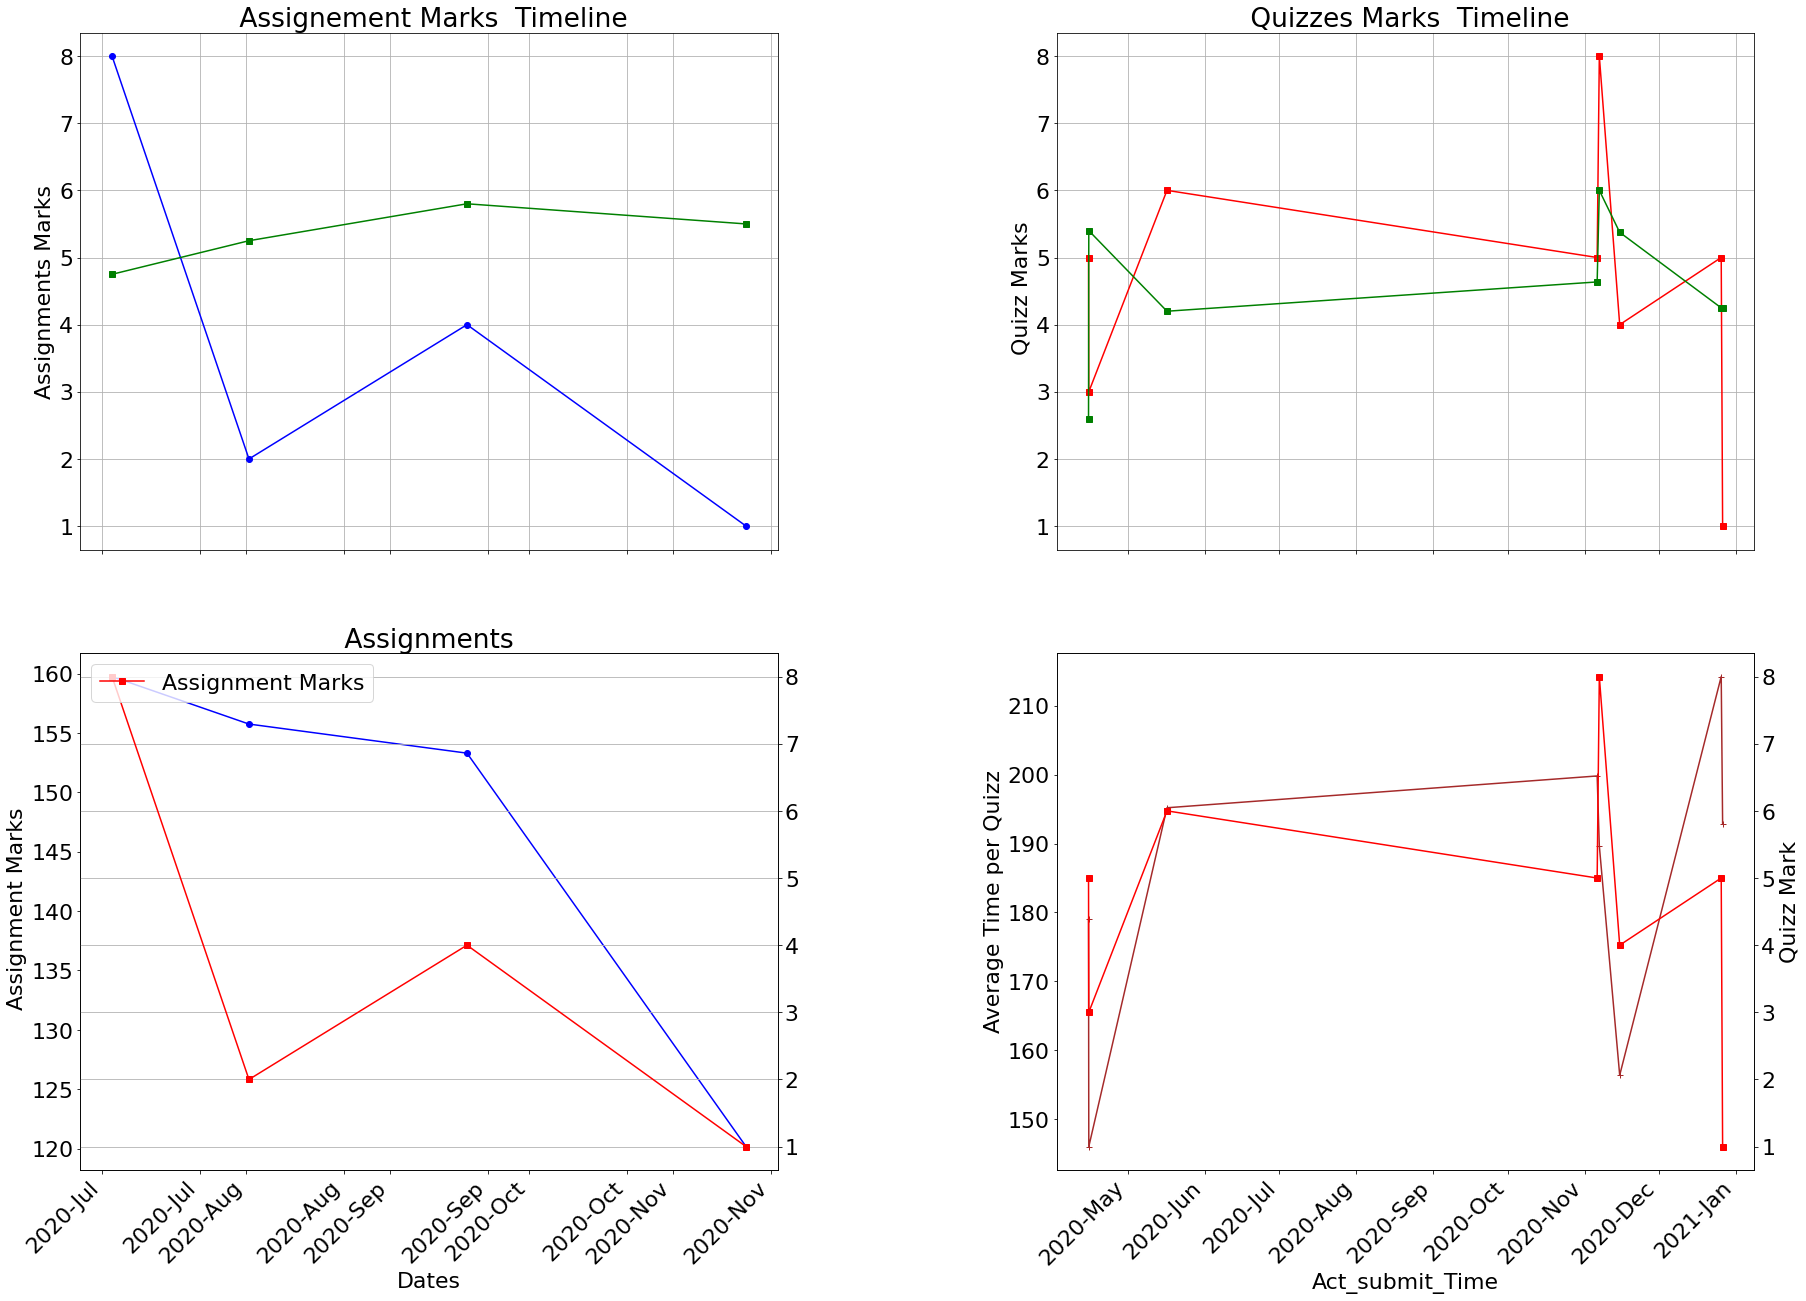

In [ ]:
#  NUmber of Assignments is less then Quizzes
plt.rcParams.update({'font.size': 22})
plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

fig, ax=plt.subplots(2, 2, figsize=(30,20) )
plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

df_plt[df_plt.Activity_type==1]["Act_mark"].plot( subplots=True,marker="o",    ax=ax[0, 0] , color="blue", label="Assignement")
df_plt[df_plt.Activity_type==1]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,0] , color="green", label="Average Quizz Marks" )

df_plt[df_plt.Activity_type==0]["Act_mark"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="red", label="Quizz Marks" )
df_plt[df_plt.Activity_type==0]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="green", label="Average Quizz Marks" )
# add time Avg per Activity

ax4=ax[1,1].twinx()
df_plt[df_plt.Activity_type==0]["Act_mark"].plot( subplots=True, marker="s",   ax=ax4 , color="red", label="Quizz Marks" )

df_plt[df_plt.Activity_type==0]["Act_time_avg"].plot( subplots=True, marker="+",   ax=ax[1,1] , color="brown", label="Average time" )


ax3=ax[1,0].twinx()
df_plt[df_plt.Activity_type==1]["Act_mark"].plot( subplots=True, marker="s",   ax=ax3 , color="red", label="Assignment Marks" )
df_plt[df_plt.Activity_type==1]["Act_time_avg"].plot( subplots=True,marker="o",    ax=ax[1, 0] , color="blue", label="Assignement Submission Avg time")



plt.legend( loc="upper left")
# Set title and labels for axes
ax[0,0].set(xlabel="Dates",
       ylabel="Assignments Marks",
       title=" Assignement Marks  Timeline")
fig.autofmt_xdate(rotation=45)

plt.grid()
ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

ax[0,1].set(xlabel="Dates",
       ylabel=" Quizz Marks",
       title=" Quizzes Marks  Timeline")
ax4.set(
       ylabel="   Quizz Mark",
       )
ax[1,1].set(
       ylabel="   Average Time per Quizz"
       )

ax[1,0].set(xlabel="Dates",
       ylabel=" Assignment Marks",
       title=" Assignments ")

fig.autofmt_xdate(rotation=45)

ax[0,0].grid()
# ax[1,0].grid()
ax[0,1].grid()
ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

## Student Achievement Graph

In [ ]:
df_mg.sample()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
070390556,g8_6,0,1.5,3.0,2,9.99,6.45,5.006316,138,120.5,24.748737,29.30408,1.483146,2.561798,89,9.99,5.301798,0.02,298.0,166.314607,30.0,19,9.99


In [ ]:
df_mg.loc["060218584"]

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060218584,g9_2,1,1.5,2.50,2,3.18,2.3550,1.166726,280,274.50,7.778175,7.526023,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,1.53
060218584,g9_3,0,1.5,2.75,4,9.27,7.4625,1.778096,173,108.25,53.643111,21.943056,1.447368,2.526316,76,9.93,4.858289,0.21,291.0,154.723684,30.0,20,5.38
060218584,g9_5,0,2.0,1.00,1,4.07,4.0700,0.000000,127,127.00,0.000000,5.642218,1.439024,2.536585,82,9.82,5.283049,0.21,299.0,174.048780,31.0,20,4.07
060218584,g9_5,1,2.0,1.50,2,9.06,6.6800,3.365828,154,128.50,36.062446,20.254979,1.454545,2.623377,77,9.94,4.861169,0.12,299.0,168.623377,33.0,20,4.30
060218584,g9_6,0,1.4,2.20,5,9.90,3.2460,3.862425,266,168.00,92.404004,52.356925,1.555556,2.444444,81,9.96,4.575185,0.14,285.0,161.209877,30.0,20,2.01
060218584,g9_6,1,1.0,1.00,1,0.46,0.4600,0.000000,163,163.00,0.000000,0.505362,1.527027,2.310811,74,9.94,5.129324,0.07,296.0,184.621622,33.0,19,0.46
060218584,g9_1,1,1.0,3.00,3,9.83,7.0200,3.035836,234,123.00,98.503807,24.437554,1.387500,2.575000,80,9.83,4.736750,0.03,299.0,171.812500,37.0,20,3.80
060218584,g9_1,0,2.0,2.00,1,3.35,3.3500,0.000000,123,123.00,0.000000,6.002394,1.400000,2.500000,70,9.97,4.668286,0.05,294.0,133.814286,30.0,20,3.35
060218584,g9_2,0,1.0,1.00,2,6.51,5.3600,1.626346,206,119.50,122.329473,10.395442,1.484848,2.378788,66,9.91,5.311818,0.12,292.0,142.348485,31.0,20,4.21


In [ ]:
# df_mg.loc["140929530")& (df_mg.Activity_type=="0")]["Act_mark_mean"].plot()

In [ ]:
# df_mg[(df_mg.student_ID=="060109224")& (df_mg.Activity_type=="0")]["Act_mark_mean"].std()

In [ ]:
pd.pivot_table(df_avt, index=["student_ID"], values=["Activity_id"], aggfunc=["count"])

,count
,Activity_id
student_ID,
060130111,21
060130477,19
060181024,11
060218584,23
060234794,21
...,...
141239332,21
141240002,7


In [ ]:
df_ActAv= df_avt.groupby(["Activity_type", "Activity_id"]).agg(["mean"])

In [ ]:
df_ActAv=pd.pivot_table(df_avt, index=["Course_code", "Activity_type", "Activity_id"], 
               values=["Act_diff", 	"Act_cp", 	"Act_time" , 	"Act_mark"] , aggfunc=("mean")).rename(
   columns={
    "Act_diff": "Act_diff_avg", 	
    "Act_cp": "Act_cp_avg", 	
    "Act_time" : "Act_time_avg" , 	
    "Act_mark" : "Act_mark_avg" 
   } 
)

In [ ]:
df_ActAv.head()

Act_cp_avg  ...  Act_time_avg
Course_code Activity_type Activity_id              ...              
g1_1        0             g1_1-Act_1     1.000000  ...    212.000000
                          g1_1-Act_10    1.500000  ...    190.500000
                          g1_1-Act_11    1.250000  ...    190.250000
                          g1_1-Act_12    1.666667  ...    227.666667
                          g1_1-Act_13    1.500000  ...    157.833333

[5 rows x 4 columns]

In [ ]:
df_ActAv.shape

(2094, 4)

In [ ]:
df_avt[(df_avt.Activity_id=="g1_1-Act_10") & (df_avt.Activity_type=="0")]

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-11-16 18:30:57,140525576,g1_1,g1_1-Act_10,0,Un_9,Chp_9,Ls_9,1,2,134,16-11-2020 18:30:57,4.06
2020-04-14 01:19:08,141161046,g1_1,g1_1-Act_10,0,Un_3,Chp_4,Ls_6,3,1,247,14-04-2020 01:19:08,7.98


In [ ]:
df_avt.loc["2020-09"]

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-09-25 08:49:11,090329844,g6_2,g6_2-Act_10,1,Un_5,Chp_1,Ls_0,2,2,273,25-09-2020 08:49:11,6.47
2020-09-07 16:33:32,141135535,g1_2,g1_2-Act_2,1,Un_2,Chp_2,Ls_6,2,1,277,09-07-2020 16:33:32,3.81
2020-09-11 17:24:59,141135535,g1_3,g1_3-Act_14,1,Un_0,Chp_1,Ls_1,4,1,76,09-11-2020 17:24:59,5.21
2020-09-03 13:29:32,060338585,g9_2,g9_2-Act_3,1,Un_7,Chp_2,Ls_9,1,2,133,09-03-2020 13:29:32,5.98
2020-09-07 06:56:24,060338585,g9_4,g9_4-Act_18,0,Un_1,Chp_4,Ls_1,4,2,272,09-07-2020 06:56:24,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19 06:06:01,110196213,g4_3,g4_3-Act_6,1,Un_4,Chp_9,Ls_6,1,2,180,19-09-2020 06:06:01,6.87
2020-09-17 00:35:22,100511108,g5_1,g5_1-Act_9,0,Un_1,Chp_0,Ls_1,1,2,116,17-09-2020 00:35:22,6.58
2020-09-19 15:04:52,120616798,g3_1,g3_1-Act_13,1,Un_8,Chp_4,Ls_8,3,2,126,19-09-2020 15:04:52,8.04


In [ ]:
df_ActAv.head()

Act_cp_avg  ...  Act_time_avg
Course_code Activity_type Activity_id              ...              
g1_1        0             g1_1-Act_1     1.000000  ...    212.000000
                          g1_1-Act_10    1.500000  ...    190.500000
                          g1_1-Act_11    1.250000  ...    190.250000
                          g1_1-Act_12    1.666667  ...    227.666667
                          g1_1-Act_13    1.500000  ...    157.833333

[5 rows x 4 columns]

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-07-29 07:45:21,071146760,g8_3,g8_3-Act_4,1,Un_9,Chp_4,Ls_8,3,1,178,29-07-2020 07:45:21,2.68
2020-08-22 17:56:26,071146760,g8_2,g8_2-Act_9,0,Un_9,Chp_6,Ls_6,1,2,274,22-08-2020 17:56:26,8.28
2020-11-26 02:22:48,071146760,g8_4,g8_4-Act_11,0,Un_3,Chp_7,Ls_2,4,1,99,26-11-2020 02:22:48,2.62
2020-03-16 12:58:05,071146760,g8_6,g8_6-Act_9,1,Un_1,Chp_3,Ls_2,4,2,257,16-03-2020 12:58:05,7.63
2020-10-19 21:43:20,071146760,g8_6,g8_6-Act_17,1,Un_0,Chp_1,Ls_2,2,1,39,19-10-2020 21:43:20,3.99


In [ ]:
#df_avt.to_csv("./Data/ActData.csv")

In [ ]:
#   alternative : df_avt=pd.read_csv("./Data/ActData.csv",parse_dates=["Act_submit_Time"], index_col=0)

In [ ]:
df_avt[df_avt.student_ID=="060218584"]

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-04-23 23:23:45,060218584,g9_5,g9_5-Act_5,0,Un_9,Chp_1,Ls_6,1,1,168,23-04-2020 23:23:45,4.78
2021-01-15 02:52:40,060218584,g9_4,g9_4-Act_8,1,Un_9,Chp_8,Ls_6,4,2,262,15-01-2021 02:52:40,0.89
2020-07-18 04:32:34,060218584,g9_3,g9_3-Act_14,1,Un_7,Chp_2,Ls_3,3,1,269,18-07-2020 04:32:34,3.40
2020-08-26 22:10:24,060218584,g9_3,g9_3-Act_7,0,Un_5,Chp_1,Ls_1,4,2,98,26-08-2020 22:10:24,1.40
2020-09-11 19:54:05,060218584,g9_6,g9_6-Act_7,0,Un_1,Chp_7,Ls_8,1,1,91,09-11-2020 19:54:05,7.65
2021-02-14 21:43:33,060218584,g9_3,g9_3-Act_12,1,Un_9,Chp_7,Ls_9,4,1,148,14-02-2021 21:43:33,6.51
2020-03-03 04:44:54,060218584,g9_2,g9_2-Act_14,0,Un_2,Chp_1,Ls_8,2,2,160,03-03-2020 04:44:54,1.62
2020-07-24 18:11:04,060218584,g9_1,g9_1-Act_17,1,Un_5,Chp_8,Ls_8,2,1,137,24-07-2020 18:11:04,3.46
2020-08-18 12:47:25,060218584,g9_2,g9_2-Act_16,1,Un_9,Chp_3,Ls_7,2,2,161,18-08-2020 12:47:25,8.52


In [ ]:
df_avt.index=pd.to_datetime(df_avt.Act_submit_Time)

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-07-29 07:45:21,071146760,g8_3,g8_3-Act_4,1,Un_9,Chp_4,Ls_8,3,1,178,29-07-2020 07:45:21,2.68
2020-08-22 17:56:26,071146760,g8_2,g8_2-Act_9,0,Un_9,Chp_6,Ls_6,1,2,274,22-08-2020 17:56:26,8.28
2020-11-26 02:22:48,071146760,g8_4,g8_4-Act_11,0,Un_3,Chp_7,Ls_2,4,1,99,26-11-2020 02:22:48,2.62
2020-03-16 12:58:05,071146760,g8_6,g8_6-Act_9,1,Un_1,Chp_3,Ls_2,4,2,257,16-03-2020 12:58:05,7.63
2020-10-19 21:43:20,071146760,g8_6,g8_6-Act_17,1,Un_0,Chp_1,Ls_2,2,1,39,19-10-2020 21:43:20,3.99


In [ ]:
df_mg.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060130111,g9_2,1,2.0,2.0,1,6.94,6.940,0.000000,31,31.0,0.000000,12.434811,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,6.94
060218584,g9_2,1,1.5,2.5,2,3.18,2.355,1.166726,280,274.5,7.778175,7.526023,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,1.53
060234794,g9_2,1,2.0,3.5,2,7.23,6.770,0.650538,219,196.5,31.819805,17.062948,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,6.31
060236572,g9_2,1,2.0,3.0,1,8.13,8.130,0.000000,178,178.0,0.000000,16.905860,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,8.13
060271944,g9_2,1,1.0,2.5,2,6.55,5.555,1.407142,243,168.5,105.358910,12.340147,1.486486,2.702703,74,9.91,5.193243,0.43,295.0,159.662162,31.0,20,4.56


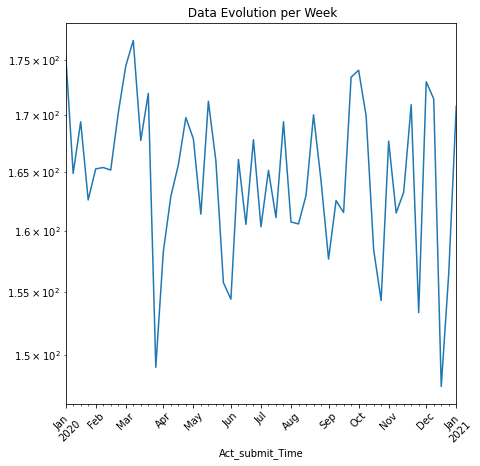

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
df_avt.loc["2020", "Act_time"].resample("w").mean().plot()
plt.yscale("log")
plt.title(" Data Evolution per Week")
plt.xticks(rotation="45")
plt.show()

In [ ]:
df_plt=  df_avt[df_avt.student_ID=="060218584"].loc["2020-4":"2021-2" ,["Course_code", "Activity_type" , "Activity_id", "Act_diff", 	"Act_cp", 	"Act_time"	,"Act_mark"]]

In [ ]:
df_plt.groupby("Course_code").Activity_id.agg("count")

Course_code
g9_1    1
g9_2    2
g9_3    5
g9_4    3
g9_5    3
g9_6    3
Name: Activity_id, dtype: int64

In [ ]:
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,
2020-04-23 23:23:45,g9_5,0,g9_5-Act_5,1,1,168,4.78
2021-01-15 02:52:40,g9_4,1,g9_4-Act_8,4,2,262,0.89
2020-07-18 04:32:34,g9_3,1,g9_3-Act_14,3,1,269,3.40
2020-08-26 22:10:24,g9_3,0,g9_3-Act_7,4,2,98,1.40
2020-09-11 19:54:05,g9_6,0,g9_6-Act_7,1,1,91,7.65


In [ ]:
df_plt.reset_index(inplace=True)

In [ ]:
# Act_10	2.639752	1.478261	167.832298	4.285714

In [ ]:
df_plt=df_plt.merge( df_ActAv, on=["Activity_type", "Activity_id" ])

In [ ]:
df_plt.keys()

Index(['Act_submit_Time', 'Course_code', 'Activity_type', 'Activity_id',
       'Act_diff', 'Act_cp', 'Act_time', 'Act_mark', 'Act_cp_avg',
       'Act_diff_avg', 'Act_mark_avg', 'Act_time_avg'],
      dtype='object')

In [ ]:
df_plt.set_index("Act_submit_Time", inplace=True)

In [ ]:
# this is dataset fro a particular Student.
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Act_submit_Time,,,,,,,,,,,
2020-04-23 23:23:45,g9_5,0,g9_5-Act_5,1,1,168,4.78,1.400000,2.800000,5.536000,158.600000
2021-01-15 02:52:40,g9_4,1,g9_4-Act_8,4,2,262,0.89,1.400000,2.400000,4.060000,151.800000
2020-07-18 04:32:34,g9_3,1,g9_3-Act_14,3,1,269,3.40,1.000000,2.142857,3.294286,209.285714
2020-08-26 22:10:24,g9_3,0,g9_3-Act_7,4,2,98,1.40,1.428571,2.428571,4.845714,155.285714
2020-09-11 19:54:05,g9_6,0,g9_6-Act_7,1,1,91,7.65,1.500000,2.000000,5.262500,101.500000


$$\Huge \text {Bander  loves   playing games}$$

In [ ]:
df_plt["Activity_type"]=df_plt.Activity_type.astype(int)  

In [ ]:
df_plt[df_plt.Activity_type==1]["Act_mark"]

Act_submit_Time
2021-01-15 02:52:40    0.89
2020-07-18 04:32:34    3.40
2021-02-14 21:43:33    6.51
2020-07-24 18:11:04    3.46
2020-08-18 12:47:25    8.52
2020-12-29 15:02:37    5.78
2020-06-10 11:25:58    9.76
2020-11-27 15:00:59    2.42
Name: Act_mark, dtype: float64

In [ ]:
df_plt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2020-04-23 23:23:45 to 2020-11-27 15:00:59
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Course_code    17 non-null     object 
 1   Activity_type  17 non-null     int64  
 2   Activity_id    17 non-null     object 
 3   Act_diff       17 non-null     int64  
 4   Act_cp         17 non-null     int64  
 5   Act_time       17 non-null     int64  
 6   Act_mark       17 non-null     float64
 7   Act_cp_avg     17 non-null     float64
 8   Act_diff_avg   17 non-null     float64
 9   Act_mark_avg   17 non-null     float64
 10  Act_time_avg   17 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.6+ KB


In [ ]:
df_plt[df_plt.Activity_type==0]["Act_mark"]

Act_submit_Time
2020-04-23 23:23:45    4.78
2020-08-26 22:10:24    1.40
2020-09-11 19:54:05    7.65
2020-04-22 02:32:59    7.43
2020-06-22 14:22:37    8.99
2021-02-20 07:45:06    0.49
2020-07-06 09:16:26    3.47
2020-12-25 22:07:14    6.78
2020-08-19 09:47:30    7.33
Name: Act_mark, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

<Figure size 432x288 with 0 Axes>

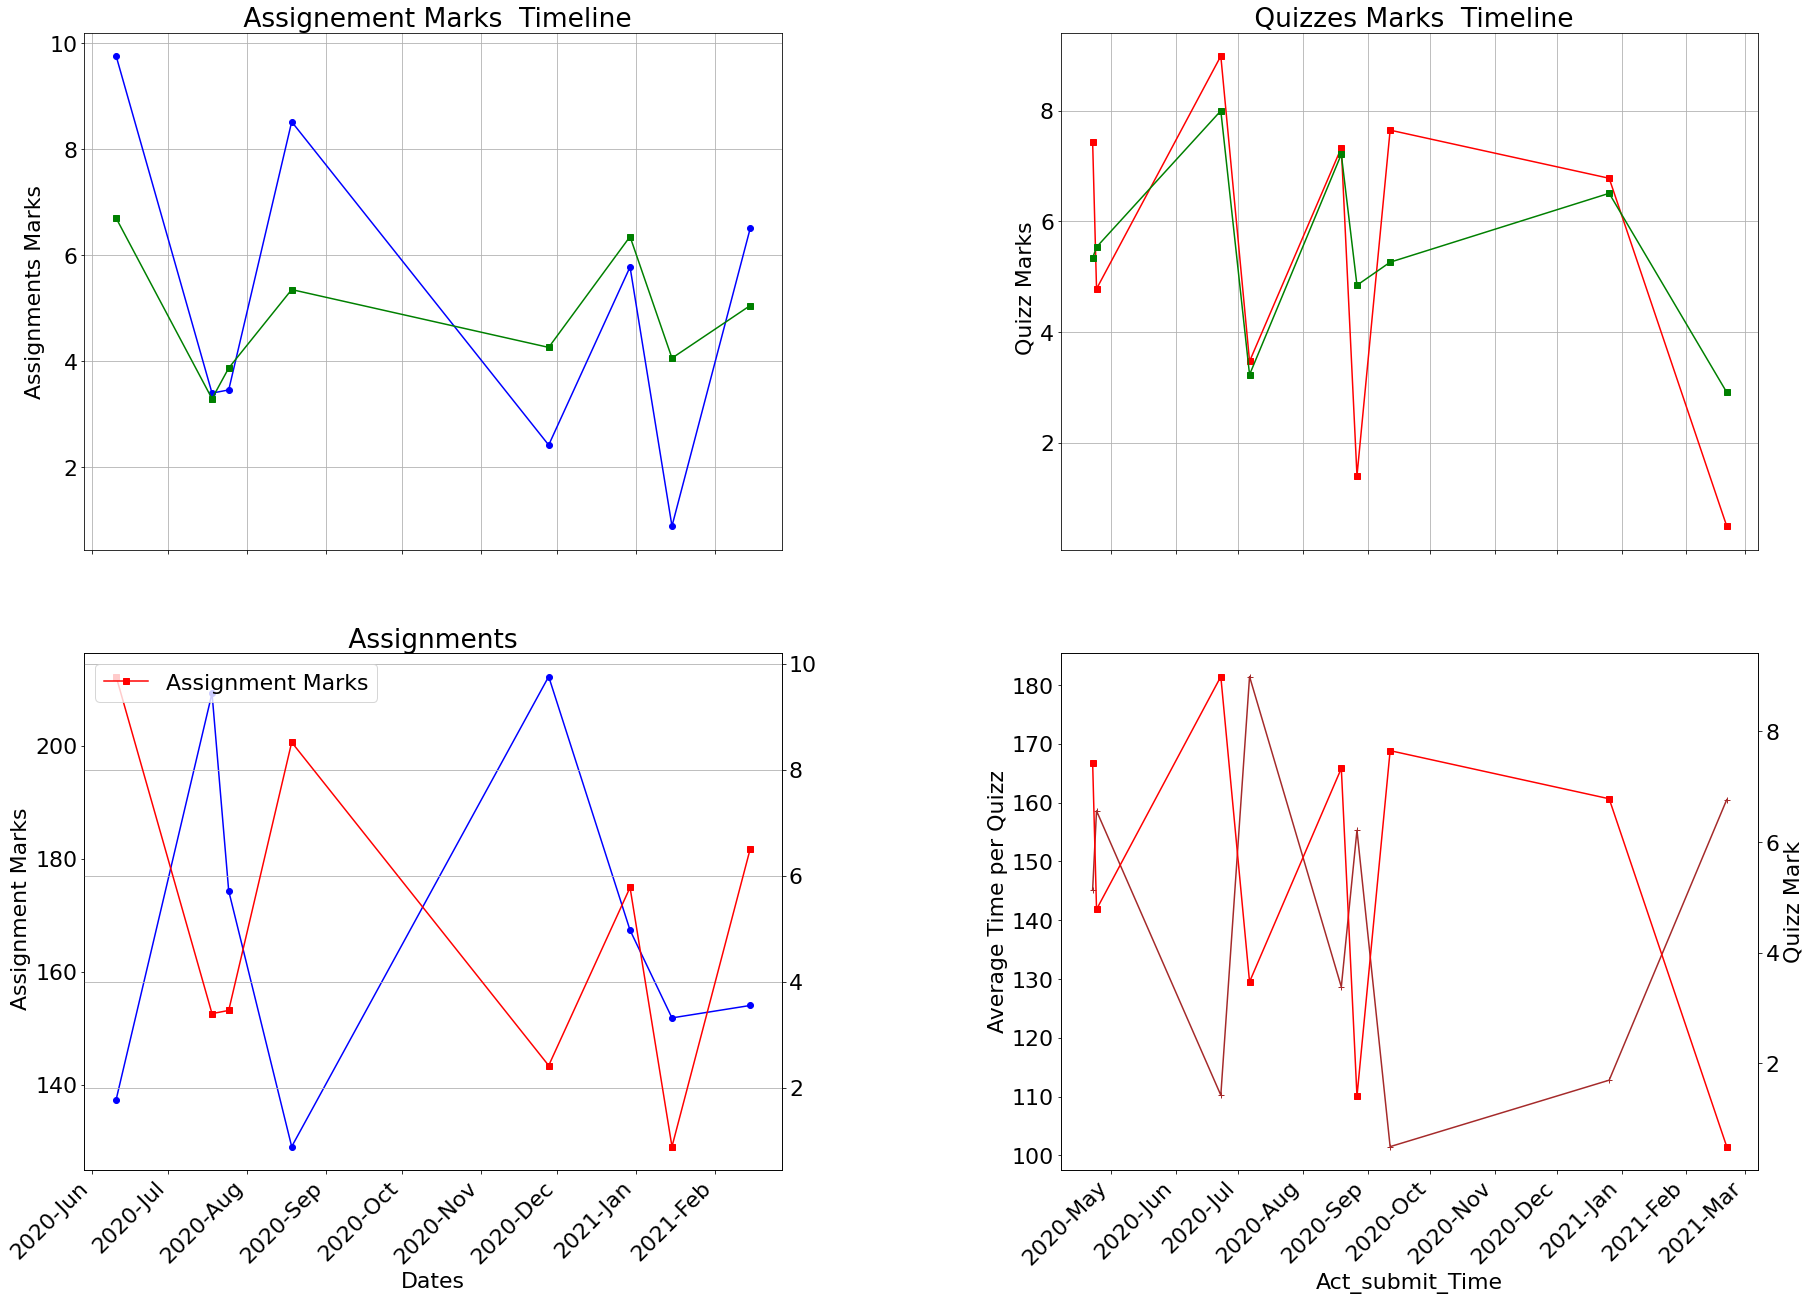

In [ ]:
#  NUmber of Assignments is less then Quizzes
plt.rcParams.update({'font.size': 22})
plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

fig, ax=plt.subplots(2, 2, figsize=(30,20) )
plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

df_plt[df_plt.Activity_type==1]["Act_mark"].plot( subplots=True,marker="o",    ax=ax[0, 0] , color="blue", label="Assignement")
df_plt[df_plt.Activity_type==1]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,0] , color="green", label="Average Quizz Marks" )

df_plt[df_plt.Activity_type==0]["Act_mark"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="red", label="Quizz Marks" )
df_plt[df_plt.Activity_type==0]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="green", label="Average Quizz Marks" )
# add time Avg per Activity

ax4=ax[1,1].twinx()
df_plt[df_plt.Activity_type==0]["Act_mark"].plot( subplots=True, marker="s",   ax=ax4 , color="red", label="Quizz Marks" )

df_plt[df_plt.Activity_type==0]["Act_time_avg"].plot( subplots=True, marker="+",   ax=ax[1,1] , color="brown", label="Average time" )


ax3=ax[1,0].twinx()
df_plt[df_plt.Activity_type==1]["Act_mark"].plot( subplots=True, marker="s",   ax=ax3 , color="red", label="Assignment Marks" )
df_plt[df_plt.Activity_type==1]["Act_time_avg"].plot( subplots=True,marker="o",    ax=ax[1, 0] , color="blue", label="Assignement Submission Avg time")



plt.legend( loc="upper left")
# Set title and labels for axes
ax[0,0].set(xlabel="Dates",
       ylabel="Assignments Marks",
       title=" Assignement Marks  Timeline")
fig.autofmt_xdate(rotation=45)

plt.grid()
ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

ax[0,1].set(xlabel="Dates",
       ylabel=" Quizz Marks",
       title=" Quizzes Marks  Timeline")
ax4.set(
       ylabel="   Quizz Mark",
       )
ax[1,1].set(
       ylabel="   Average Time per Quizz"
       )

ax[1,0].set(xlabel="Dates",
       ylabel=" Assignment Marks",
       title=" Assignments ")

fig.autofmt_xdate(rotation=45)

ax[0,0].grid()
# ax[1,0].grid()
ax[0,1].grid()
ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

In [ ]:
df_plt.sample(4)

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Act_submit_Time,,,,,,,,,,,
2020-11-06 22:42:08,g1_6,0,g1_6-Act_7,2,2,173,8,1.666667,2.666667,6.00,189.666667
2020-09-17 12:58:29,g1_1,1,g1_1-Act_6,4,1,216,4,1.700000,2.300000,5.80,153.300000
2020-07-03 01:49:24,g1_3,1,g1_3-Act_6,3,2,184,8,1.625000,1.750000,4.75,159.750000
2020-08-01 13:43:52,g1_1,1,g1_1-Act_7,2,2,241,2,1.500000,2.250000,5.25,155.750000


In [ ]:
pd.pivot_table(df_avt, 
                          index=["student_ID", "Course_code", "Activity_type"], 
                          values=["Act_diff","Act_cp","Act_time",  "Act_mark" ], 
                          aggfunc="mean") 

Act_cp  Act_diff  Act_mark  Act_time
student_ID Course_code Activity_type                                      
060109636  g9_3        1                 1.0       1.0       0.0      86.0
           g9_4        1                 1.0       1.0       0.0     221.0
           g9_5        1                 2.0       2.0       5.0     176.0
           g9_6        1                 1.5       2.5       2.0     105.0
060139076  g9_1        1                 2.0       2.0       6.5     204.0
...                                      ...       ...       ...       ...
141278416  g1_4        1                 2.0       3.0       5.0     108.0
           g1_5        0                 1.0       4.0       1.0     169.0
                       1                 2.0       4.0       4.0     212.0
           g1_6        0                 2.0       2.0       1.0     248.0
                       1                 1.0       2.0       6.0     100.0

[3737 rows x 4 columns]

In [ ]:
#Group  student_id achivements  by subject,   to get a score,  


pd.merge( pd.pivot_table(df_avt, 
                          index=["student_ID", "Course_code", "Activity_type"], 
                          values=["Act_diff","Act_cp","Act_time",  "Act_mark" ], 
                          aggfunc="mean") ,
          df_ActAv, on=["Course_code", "Activity_type"]
)
          
          

Act_cp  Act_diff  ...  Act_mark_avg  Act_time_avg
Course_code Activity_type                    ...                            
g9_1        0                 2.0       2.5  ...      3.000000    250.333333
            0                 2.0       2.5  ...      7.500000    111.000000
            0                 2.0       2.5  ...      4.500000    194.500000
            0                 2.0       2.5  ...      4.857143    132.714286
            0                 2.0       2.5  ...      2.500000    208.000000
...                           ...       ...  ...           ...           ...
g1_4        1                 1.0       4.0  ...      3.714286    171.285714
            1                 1.0       4.0  ...      5.700000    178.000000
            1                 1.0       4.0  ...      4.000000    143.000000
            1                 1.0       4.0  ...      3.666667    164.166667
            1                 1.0       4.0  ...      5.200000    209.600000

[37110 rows x 8 columns]

In [ ]:
df_ActAv.sample(10)

,,,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Course_code,Activity_type,Activity_id,,,,
g2_2,0,g2_2-Act_6,1.444444,2.111111,3.222222,175.444444
g8_5,0,g8_5-Act_4,2.000000,3.000000,6.000000,153.000000
g3_2,0,g3_2-Act_5,1.571429,2.714286,4.142857,129.142857
g5_2,1,g5_2-Act_3,1.300000,2.500000,5.700000,158.600000
g4_2,1,g4_2-Act_1,1.750000,2.000000,6.000000,213.875000
g2_2,1,g2_2-Act_7,1.500000,1.250000,4.750000,209.250000
g5_2,0,g5_2-Act_1,1.300000,2.200000,4.100000,201.700000
g3_6,1,g3_6-Act_7,1.400000,3.400000,4.200000,170.200000
g6_6,0,g6_6-Act_4,1.571429,2.714286,2.571429,158.285714


In [ ]:
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Act_submit_Time,,,,,,,,,,,
2020-07-18 22:34:00,g9_5,1,g9_5-Act_9,4,2,265,2,1.545455,2.636364,4.272727,172.909091
2020-08-09 01:57:28,g9_3,1,g9_3-Act_9,4,2,52,0,1.750000,2.250000,3.250000,68.500000
2020-06-25 13:30:59,g9_5,1,g9_5-Act_5,3,2,76,4,2.000000,3.000000,3.714286,134.428571
2020-08-30 20:04:12,g9_4,1,g9_4-Act_7,4,2,268,8,1.333333,2.666667,4.166667,248.833333
2020-06-07 06:49:13,g9_4,0,g9_4-Act_1,4,1,167,5,1.600000,3.400000,6.000000,157.400000


In [ ]:
df_plt.sample()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Act_submit_Time,,,,,,,,,,,
2021-02-14 04:26:31,g9_6,0,g9_6-Act_6,4,1,66,2,1.333333,3.666667,4.0,99.0


In [ ]:
#  Average marks grouped by subjects  and  types

pd.pivot_table(df_avt, index=["Activity_id", "Activity_type"], values=["Act_mark", "Act_time"], aggfunc=["mean"])

mean            
                           Act_mark    Act_time
Activity_id Activity_type                      
g1_1-Act_1  0              3.636364  155.727273
            1              2.833333  174.333333
g1_1-Act_10 0              4.800000  119.000000
            1              4.875000  174.375000
g1_1-Act_2  0              2.833333  158.833333
...                             ...         ...
g9_6-Act_7  1              4.500000  123.833333
g9_6-Act_8  0              3.600000  147.000000
            1              3.500000  179.500000
g9_6-Act_9  0              8.200000  140.800000
            1              3.500000  164.875000

[1077 rows x 2 columns]

In [ ]:
df_plt.index.values

array(['2020-07-18T22:34:00.000000000', '2020-08-09T01:57:28.000000000',
       '2020-06-25T13:30:59.000000000', '2020-08-30T20:04:12.000000000',
       '2020-06-07T06:49:13.000000000', '2021-02-03T08:00:25.000000000',
       '2020-07-08T23:13:28.000000000', '2021-02-14T04:26:31.000000000',
       '2020-04-11T09:37:02.000000000', '2020-10-05T04:24:12.000000000',
       '2020-08-20T20:05:35.000000000', '2020-11-04T10:12:25.000000000',
       '2020-12-11T20:17:21.000000000', '2021-01-30T22:44:15.000000000',
       '2020-12-11T22:04:05.000000000', '2020-04-24T19:13:02.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_plt[["Act_mark", "Activity_type"]]

,Act_mark,Activity_type
Act_submit_Time,,
2020-07-18 22:34:00,2,1
2020-08-09 01:57:28,0,1
2020-06-25 13:30:59,4,1
2020-08-30 20:04:12,8,1
2020-06-07 06:49:13,5,0
2021-02-03 08:00:25,6,0
2020-07-08 23:13:28,0,1
2021-02-14 04:26:31,2,0
2020-04-11 09:37:02,9,1


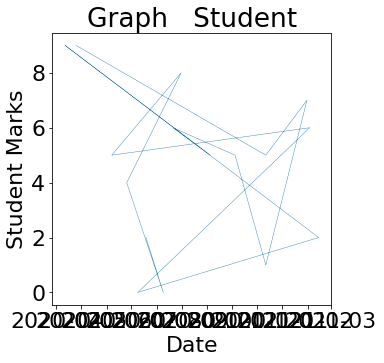

In [ ]:
from matplotlib.dates import DateFormatter


fig, ax=plt.subplots(figsize=(5,5))

ax.plot(df_plt.index.values, df_plt["Act_mark"], linewidth=0.4)

ax.set(xlabel="Date",
       ylabel="Student Marks",
       title="Graph   Student")
# Define the date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [ ]:
# df_plt["Act_mark"].plot(linewidth=.3)
# plt.xticks(ticks=["MArch", "oct", "nov", "Jan"]) 

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (5, 4), 'figure.dpi': 120})


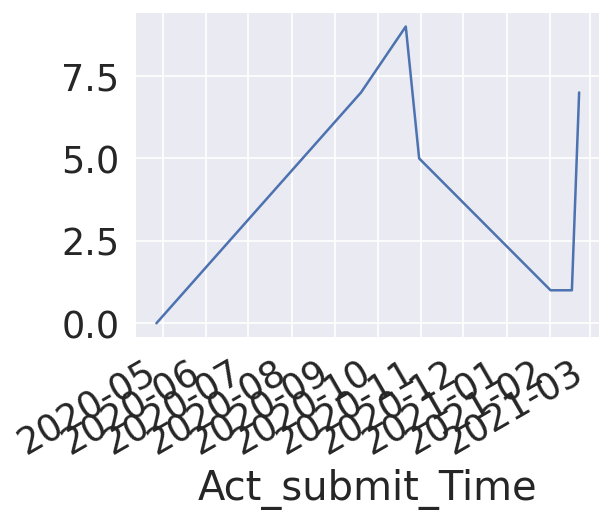

In [ ]:
df_plt.Act_mark.plot()

In [ ]:
df_avt.set_index("Act_submit_Time", inplace=True)


In [ ]:
df_avt.sample(3)

,student_ID,Course_code,Activity_id,Activity_type,Act_count,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,,
18-01-2021 10:45:46,060707926,g9_2,g9_2-Act_9,0,6,Un_0,Chp_9,Ls_2,3,2,55,18-01-2021 10:45:46,5
07-03-2020 00:30:00,141286874,g1_5,g1_5-Act_5,0,7,Un_6,Chp_2,Ls_7,2,1,149,07-03-2020 00:30:00,5
05-01-2020 07:52:55,141055522,g1_3,g1_3-Act_6,1,2,Un_7,Chp_6,Ls_4,1,2,277,05-01-2020 07:52:55,5


In [ ]:
df_avt.loc["2020-03", "Act_mark"].head()

KeyError: ignored

In [ ]:
pd.crosstab(df_avt.student_ID, df_avt.Activity_id)

Activity_id,Act_1,Act_10,Act_2,Act_3,Act_4,Act_5,Act_6,Act_7,Act_8,Act_9
student_ID,,,,,,,,,,
60158028,1,1,1,1,1,1,1,1,1,1
60218841,1,1,1,1,1,1,1,1,1,1
60239241,1,1,1,1,1,1,1,1,1,1
60256903,1,0,0,0,1,0,1,0,0,0
60259840,1,1,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
141172584,1,1,1,1,1,1,0,1,0,1
141212018,0,1,0,1,0,0,1,0,1,0
141246965,0,0,0,0,1,0,1,0,1,0


In [ ]:
pd.pivot_table( df_avt, index=["student_ID", "Course_code"], values=["Activity_id"], aggfunc="count")

Activity_id
student_ID Course_code             
060158028  g9_1                   1
           g9_2                   1
           g9_3                   1
           g9_4                   2
           g9_5                   3
...                             ...
141254552  g1_5                   2
           g1_6                   3
141286250  g1_1                   1
           g1_5                   2
141298980  g1_2                   1

[1990 rows x 1 columns]

In [ ]:
df_avt[df_avt.student_ID=="060158028"]

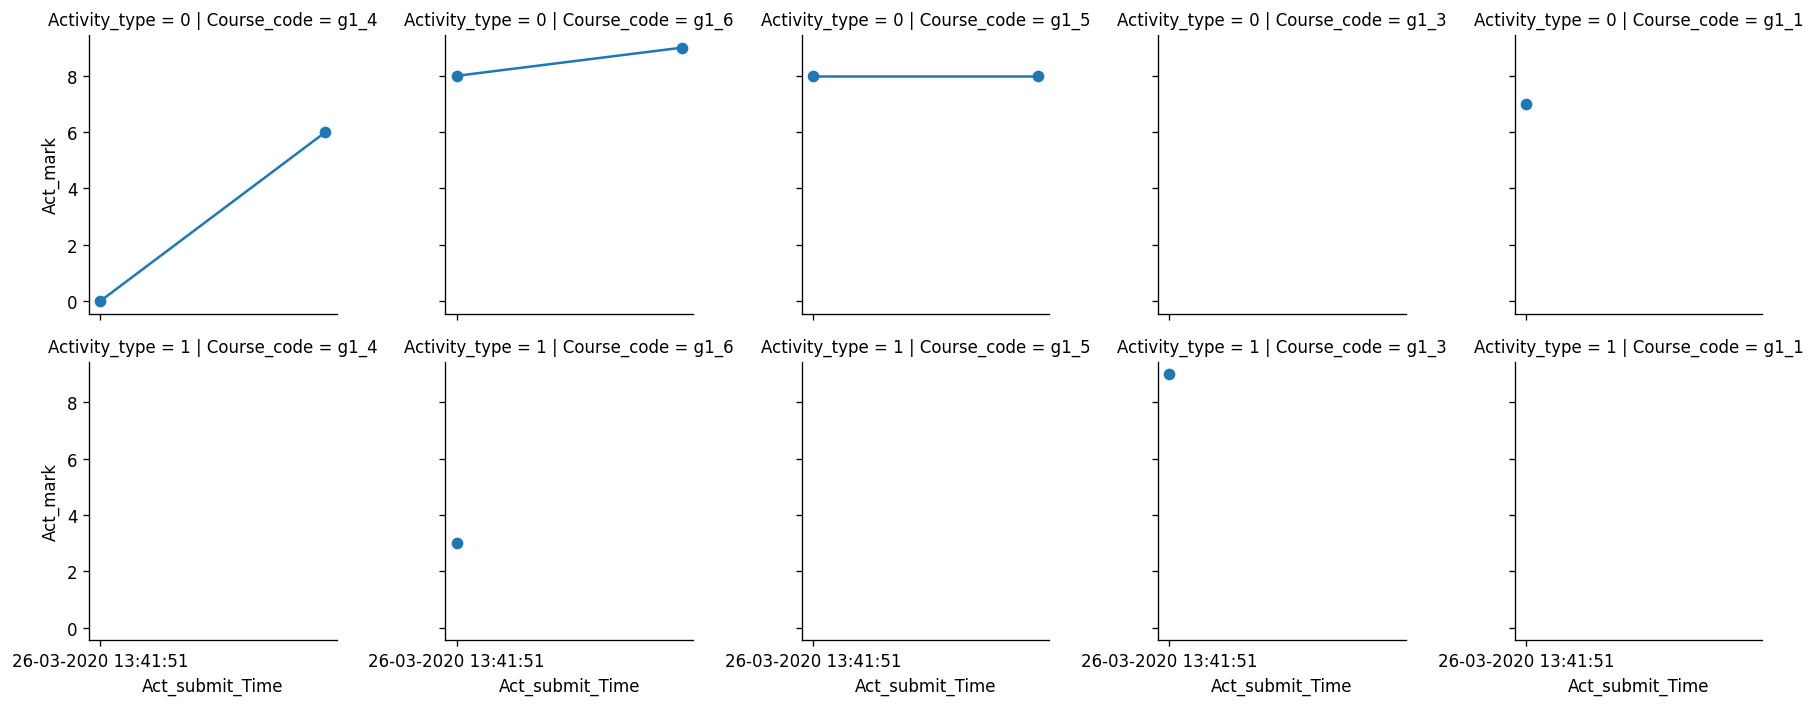

In [ ]:
g=sns.FacetGrid(df_avt[df_avt.student_ID=="141254552"],  col="Course_code", row="Activity_type")
g=g.map( plt.plot, "Act_submit_Time", "Act_mark", marker="o")

In [ ]:
df_avt[df_avt.student_ID==60158028 ].resample("m") #).loc["2020", "Act_mark"].resample("m")

In [ ]:
temp=df_avt[df_avt.student_ID==60158028 ]
df_avt[df_avt.student_ID==60158028].loc["2020":"2021", "Act_mark"].plot( ,)

SyntaxError: ignored

In [ ]:
temp

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,,,,
2020-10-26 19:36:47,60158028,g9_2,Act_9,1,Un_1,Chp_2,Ls_8,4,1,148,6
2020-06-30 13:50:03,60158028,g9_1,Act_8,1,Un_7,Chp_3,Ls_4,4,2,298,9
2020-08-02 23:45:46,60158028,g9_5,Act_10,0,Un_2,Chp_5,Ls_2,4,1,216,3
2020-09-11 23:14:51,60158028,g9_1,Act_1,1,Un_6,Chp_4,Ls_3,4,2,223,4
2020-11-09 09:39:30,60158028,g9_3,Act_3,1,Un_7,Chp_0,Ls_9,4,2,39,3
2020-02-15 21:11:14,60158028,g9_5,Act_6,1,Un_0,Chp_7,Ls_4,1,2,189,3
2020-07-20 15:20:37,60158028,g9_5,Act_7,0,Un_7,Chp_9,Ls_2,3,2,226,6
2021-01-30 03:45:35,60158028,g9_5,Act_4,0,Un_0,Chp_0,Ls_2,1,1,103,2
2020-03-21 16:18:16,60158028,g9_6,Act_2,1,Un_6,Chp_9,Ls_4,1,1,284,7


## Date Conversion

In [ ]:
df_a["day"]= df_a.StartTime.dt.day
df_a["month"]= df_a.StartTime.dt.month
df_a["year"]= df_a.StartTime.dt.year
df_a["hour"]= df_a.StartTime.dt.hour
df_a["minutes"]= df_a.StartTime.dt.minute
df_a["seconds"]= df_a.StartTime.dt.second

# df_act.drop("StartTime", axis=1, inplace=True)

In [ ]:
for col in df_a.select_dtypes("object").columns:
  df_a[col]=df_a[col].astype("category")

In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1429
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   student_id          1430 non-null   int64         
 1   Course_code         1430 non-null   category      
 2   Unit_id             1430 non-null   category      
 3   Chapter_id          1430 non-null   category      
 4   Lesson_id           1430 non-null   category      
 5   Activity_id         1430 non-null   category      
 6   Acivity_diff        1430 non-null   int64         
 7   Activity_subm_time  1430 non-null   int64         
 8   StartTime           1430 non-null   datetime64[ns]
 9   Acivity_mark        1430 non-null   int64         
 10  Nb_Cp               1430 non-null   int64         
 11  day                 1430 non-null   int64         
 12  month               1430 non-null   int64         
 13  year                1430 non-null   int64       

In [ ]:
df_a.set_index("StartTime", inplace=True)

In [ ]:
df_a.loc["2020-03", "Acivity_mark"].head()

StartTime
2020-03-31 07:55:01    1
2020-03-30 09:23:32    4
2020-03-03 08:55:46    5
2020-03-20 13:43:27    8
2020-03-05 03:01:30    0
Name: Acivity_mark, dtype: int64

In [ ]:
df_st=pd.read_csv("./Data/Edited-Students.csv", index_col=0)
df_st.shape  , df_a.shape

((100, 6), (1430, 16))

In [ ]:
df_act=pd.merge(df_st, df_a, on="student_id")

In [ ]:
df_act.head()

,student_id,school,grade,gender,governorate,course_lastyear_mark,Course_code,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp,day,month,year,hour,minutes,seconds
0,0,Sc_8,11,F,North,97,Course_4,Un_0,Chp_6,Ls_2,Quizz_9,3,99,8,1,22,7,2020,13,33,34
1,0,Sc_8,11,F,North,97,Course_2,Un_3,Chp_6,Ls_2,Quizz_6,4,191,0,2,31,8,2020,18,27,19
2,0,Sc_8,11,F,North,97,Course_0,Un_2,Chp_2,Ls_7,Assignement_3,4,100,1,2,30,7,2020,12,44,40
3,0,Sc_8,11,F,North,97,Course_0,Un_8,Chp_0,Ls_8,Quizz_2,2,270,1,1,8,6,2020,11,44,45
4,0,Sc_8,11,F,North,97,Course_5,Un_0,Chp_7,Ls_7,Assignement_8,1,262,7,2,11,7,2020,7,17,1


In [ ]:

df_act.shape

(1430, 21)

In [ ]:
df_merged=pd.merge(df_act, df_course, on='Course_code')

In [ ]:
df_merged

,student_id,school,grade,gender,governorate,course_lastyear_mark,Course_code,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp,day,month,year,hour,minutes,seconds,Act_count,total_video_sec,no_discus_participate
0,0,Sc_8,11,F,North,97,Course_4,Un_0,Chp_6,Ls_2,Quizz_9,3,99,8,1,22,7,2020,13,33,34,9,493,9
1,0,Sc_8,11,F,North,97,Course_4,Un_2,Chp_2,Ls_7,Assignement_2,1,215,4,1,22,4,2020,10,28,37,9,493,9
2,1,Sc_6,10,F,North,71,Course_4,Un_9,Chp_6,Ls_9,Quizz_2,3,171,1,1,25,1,2020,12,14,1,9,493,9
3,4,Sc_2,10,F,South,73,Course_4,Un_1,Chp_0,Ls_6,Assignement_4,4,148,8,2,20,3,2020,13,43,27,9,493,9
4,4,Sc_2,10,F,South,73,Course_4,Un_2,Chp_4,Ls_0,Quizz_5,3,73,9,2,18,12,2020,2,30,57,9,493,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,94,Sc_4,11,M,South,87,Course_7,Un_8,Chp_4,Ls_9,Quizz_1,3,233,7,2,24,1,2020,5,47,54,5,1770,27
1426,94,Sc_4,11,M,South,87,Course_7,Un_3,Chp_6,Ls_3,Assignement_5,4,184,6,2,30,1,2020,4,57,56,5,1770,27
1427,94,Sc_4,11,M,South,87,Course_7,Un_4,Chp_5,Ls_0,Assignement_3,1,233,5,1,26,8,2020,17,59,22,5,1770,27
1428,94,Sc_4,11,M,South,87,Course_7,Un_6,Chp_3,Ls_4,Assignement_2,2,80,0,1,12,12,2020,5,27,20,5,1770,27


In [ ]:
import numpy as np

In [ ]:
#  Subject grade mark editing
#df_act["subject_grade_mark"] = np.random.randint(60,101, size=len(df_act))
#df_act["subject_grade_mark"] = np.random.randint(60,101, size=len(df_act)).groupby(["student_id", "Course_code"])


In [ ]:
df_act.head()

,student_id,school,grade,gender,governorate,Course_code,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp,day,month,year,hour,minutes,seconds,subject_grade_mark
0,0,Sc_8,2,F,North,Course_7,Un_5,Chp_0,Ls_9,Quizz_6,3,239,2,1,4,12,2020,11,8,40,96
1,0,Sc_8,2,F,North,Course_5,Un_9,Chp_6,Ls_5,Assignement_1,3,285,9,1,18,1,2021,8,53,19,100
2,0,Sc_8,2,F,North,Course_3,Un_2,Chp_8,Ls_8,Assignement_2,2,236,6,2,9,10,2020,5,46,51,89
3,0,Sc_8,2,F,North,Course_8,Un_3,Chp_6,Ls_2,Assignement_3,1,184,2,1,27,11,2020,12,4,13,94
4,0,Sc_8,2,F,North,Course_6,Un_9,Chp_9,Ls_3,Assignement_7,3,190,4,2,12,1,2020,17,11,59,71


In [ ]:
df_act.groupby(['student_id', 'Course_code', 'subject_grade_mark'], as_index=False)

In [ ]:
df_act.head()

,student_id,school,grade,gender,governorate,Course_code,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp,day,month,year,hour,minutes,seconds,subject_grade_mark
0,0,Sc_8,2,F,North,Course_7,Un_5,Chp_0,Ls_9,Quizz_6,3,239,2,1,4,12,2020,11,8,40,96
1,0,Sc_8,2,F,North,Course_5,Un_9,Chp_6,Ls_5,Assignement_1,3,285,9,1,18,1,2021,8,53,19,100
2,0,Sc_8,2,F,North,Course_3,Un_2,Chp_8,Ls_8,Assignement_2,2,236,6,2,9,10,2020,5,46,51,89
3,0,Sc_8,2,F,North,Course_8,Un_3,Chp_6,Ls_2,Assignement_3,1,184,2,1,27,11,2020,12,4,13,94
4,0,Sc_8,2,F,North,Course_6,Un_9,Chp_9,Ls_3,Assignement_7,3,190,4,2,12,1,2020,17,11,59,71


In [ ]:
 
df_act.groupby(["student_id", "Course_code"])["subject_grade_mark"].value_counts()

student_id  Course_code  subject_grade_mark
0           Course_3     60                    1
                         89                    1
            Course_5     100                   1
            Course_6     71                    1
            Course_7     96                    1
                                              ..
99          Course_3     96                    2
            Course_5     65                    1
            Course_7     98                    1
            Course_8     61                    1
            Course_9     86                    1
Name: subject_grade_mark, Length: 1356, dtype: int64

In [ ]:
#df_act.groupby(["student_id", "Course_code"]).subject_grade_mark.agg(np.random.randint(60,101, size=len(df_act)))
#df_act.groupby(['student_id', 'Course_code', 'subject_grade_mark'], as_index=False).quantity.sum()


In [ ]:
#  Courses Activi Nb  Merging
df_act=pd.merge(df_course, df_act, on="Course_code")

In [ ]:
df_act.head()

,Course_code,Act_count,student_id,school,grade,gender,governorate,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp,day,month,year,hour,minutes,seconds,subject_grade_mark
0,Course_0,19,1,Sc_8,11,F,South,Un_7,Chp_9,Ls_3,Assignement_1,2,185,7,2,6,8,2020,18,21,52,100
1,Course_0,19,1,Sc_8,11,F,South,Un_8,Chp_7,Ls_1,Assignement_7,4,80,6,1,8,11,2020,19,28,49,87
2,Course_0,19,1,Sc_8,11,F,South,Un_0,Chp_5,Ls_4,Assignement_5,1,155,5,2,20,5,2020,17,47,53,66
3,Course_0,19,2,Sc_2,6,M,South,Un_3,Chp_9,Ls_9,Assignement_2,4,166,0,1,15,1,2020,14,0,0,69
4,Course_0,19,3,Sc_2,10,F,Caiptal,Un_7,Chp_2,Ls_2,Assignement_0,1,194,7,1,10,9,2020,1,44,2,74


In [ ]:
df_act.groupby(["student_id", "Course_code" , "Act_count"]).Activity_id.agg(["count"])

count
student_id Course_code Act_count       
0          Course_3    22             1
           Course_5    26             1
1          Course_1    23             1
           Course_2    8              1
           Course_3    22             3
...                                 ...
99         Course_0    19             2
           Course_2    8              2
           Course_3    22             1
           Course_4    34             1
           Course_8    21             1

[658 rows x 1 columns]

In [ ]:
df_act[df_act.student_id==10].head(100)

In [ ]:
import matplotlib.pyplot as plt
df_plot=df_act[df_act.student_id==10 ]
# plt.scatter(, df_plot.Acivity_mark)

In [ ]:
df_plot.index[0]

9

In [ ]:

#df_act.loc["2020", "Acivity_mark"].resample("Y").plot()
#plt.show

In [ ]:
df_act.loc[ : ,['month','Acivity_mark']]

,month,Acivity_mark
0,8,7
1,11,6
2,5,5
3,1,0
4,9,7
...,...,...
1377,12,0
1378,1,3
1379,3,9
1380,11,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


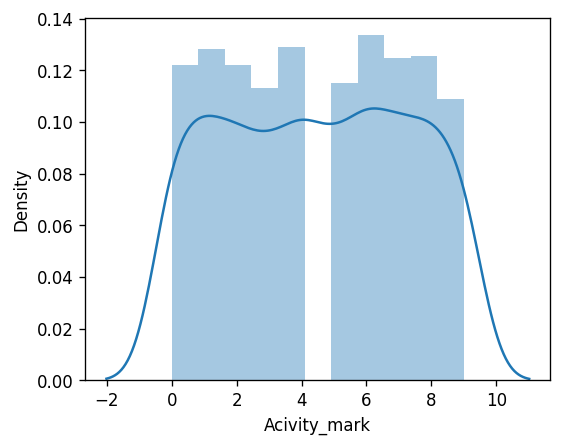

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (5, 4), 'figure.dpi': 120})
_=sns.distplot( df_act.Acivity_mark)



In [ ]:
df_act[(df_act.student_id==0) & (df_act.Course_code=="Course_1")].tail()

,student_id,subject_grade_mark,Course_code,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp,day,month,year,hour,minutes,seconds
StartTime,,,,,,,,,,,,,,,,,
2020-07-10 22:43:42,0,85,Course_1,Un_3,Chp_7,Ls_7,Quizz_10,3,168,5,1,10,7,2020,22,43,42


In [ ]:
df_act.select_dtypes("number").columns

Index(['student_id', 'subject_grade_mark', 'Acivity_diff',
       'Activity_subm_time', 'Acivity_mark', 'Nb_Cp', 'day', 'month', 'year',
       'hour', 'minutes', 'seconds'],
      dtype='object')

In [ ]:
df_act.select_dtypes(exclude="number").columns

Index(['Course_code', 'Unit_id', 'Chapter_id', 'Lesson_id', 'Activity_id'], dtype='object')

In [ ]:
df_act.keys()

Index(['Course_code', 'Act_count', 'student_id', 'school', 'grade', 'gender',
       'governorate', 'subject_grade_mark', 'Unit_id', 'Chapter_id',
       'Lesson_id', 'Activity_id', 'Acivity_diff', 'Activity_subm_time',
       'Acivity_mark', 'Nb_Cp', 'day', 'month', 'year', 'hour', 'minutes',
       'seconds'],
      dtype='object')

In [ ]:
df_act.groupby(["student_id", "Course_code"])["Activity_id"].value_counts()

student_id  Course_code  Activity_id  
0           Course_3     Quizz_6          1
            Course_5     Quizz_3          1
1           Course_1     Assignement_7    1
            Course_2     Assignement_2    1
            Course_3     Assignement_1    1
                                         ..
99          Course_2     Assignement_2    1
                         Quizz_9          1
            Course_3     Quizz_4          1
            Course_4     Quizz_9          1
            Course_8     Quizz_9          1
Name: Activity_id, Length: 1289, dtype: int64

In [ ]:
df_act.head()

,Course_code,Act_count,student_id,school,grade,gender,governorate,subject_grade_mark,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp
0,Course_0,19,2,Sc_5,9,M,Caiptal,93,Un_2,Chp_7,Ls_5,Assignement_3,1,82,7,2
1,Course_0,19,2,Sc_5,9,M,Caiptal,73,Un_5,Chp_2,Ls_6,Assignement_5,3,194,0,1
2,Course_0,19,3,Sc_8,10,F,Caiptal,90,Un_6,Chp_6,Ls_6,Assignement_6,2,241,8,2
3,Course_0,19,3,Sc_8,10,F,Caiptal,53,Un_5,Chp_3,Ls_1,Assignement_7,2,76,1,2
4,Course_0,19,3,Sc_8,10,F,Caiptal,92,Un_1,Chp_6,Ls_7,Assignement_4,1,265,9,1


In [ ]:
import numpy as np
pd.pivot_table(df_act, 
               index=["student_id", "subject_grade_mark"], 
               values= ["Course_code", "Acivity_mark", "Acivity_diff", "Activity_subm_time", "Nb_Cp"], 
aggfunc={   
"Course_code":  "count", 
"Acivity_mark" : "mean", 
"Acivity_diff": "mean", 
"Activity_subm_time": "mean", 
"Nb_Cp": "median"
}).reset_index().rename(columns=
                        {"Course_code": "Nbr Activities",
                         "Acivity_mark" : "Av_Marks", 
"Acivity_diff": "Av_Act_Diff", 
"Activity_subm_time": "Av_sbt_Time", 
"Nb_Cp": "Median_Nb_Cp"
                                 })

,student_id,subject_grade_mark,Av_Act_Diff,Av_Marks,Av_sbt_Time,Nbr Activities,Median_Nb_Cp
0,0,73,2.5,2.5,259.0,2,1.5
1,1,56,2.0,7.0,200.0,1,1.0
2,1,59,3.0,8.0,222.0,1,1.0
3,1,70,3.0,0.0,33.0,1,1.0
4,1,72,3.0,7.0,282.0,1,2.0
...,...,...,...,...,...,...,...
1133,99,71,4.0,3.0,116.0,1,2.0
1134,99,81,2.0,6.0,88.0,1,1.0
1135,99,84,2.0,0.0,264.0,1,1.0
1136,99,94,4.0,0.0,78.0,1,1.0


In [ ]:
pd.pivot_table(df_act, 
               index=["student_id", "subject_grade_mark"], 
values= ["Acivity_mark"], 
 columns=["Course_code"], fill_value=0)

Acivity_mark           ...                  
Course_code                       Course_0 Course_1  ... Course_8 Course_9
student_id subject_grade_mark                        ...                  
0          73                          0.0        0  ...        0      0.0
1          56                          0.0        0  ...        0      0.0
           59                          0.0        0  ...        0      0.0
           70                          0.0        0  ...        0      0.0
           72                          0.0        0  ...        0      0.0
...                                    ...      ...  ...      ...      ...
99         71                          3.0        0  ...        0      0.0
           81                          0.0        0  ...        0      0.0
           84                          0.0        0  ...        0      0.0
           94                          0.0        0  ...        0      0.0
           95                          0.0        0  ...        0      0.0

[1138 rows x 10 columns]

In [ ]:
pd.crosstab([df_act.student_id],df_act.Course_code)

Course_code,Course_0,Course_1,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9
student_id,,,,,,,,,,
0,0,0,0,1,0,1,0,0,0,0
1,0,1,1,3,0,1,2,1,0,2
2,2,4,3,2,2,5,4,2,3,2
3,3,0,2,3,0,1,0,0,1,0
4,1,0,2,2,3,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...
95,2,1,2,1,2,2,2,1,2,2
96,0,1,1,1,1,0,3,3,2,0
97,0,1,1,0,0,0,0,0,0,0


In [ ]:
df_act[df_act.student_id==1]

,Course_code,Act_count,student_id,school,grade,gender,governorate,subject_grade_mark,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp
122,Course_1,23,1,Sc_3,6,F,Muharaq,96,Un_8,Chp_6,Ls_4,Assignement_7,3,64,1,1
266,Course_2,8,1,Sc_3,6,F,Muharaq,99,Un_5,Chp_9,Ls_8,Assignement_2,4,261,8,1
391,Course_3,22,1,Sc_3,6,F,Muharaq,59,Un_1,Chp_9,Ls_1,Assignement_1,3,222,8,1
392,Course_3,22,1,Sc_3,6,F,Muharaq,83,Un_6,Chp_9,Ls_3,Assignement_5,4,283,7,1
393,Course_3,22,1,Sc_3,6,F,Muharaq,89,Un_1,Chp_4,Ls_5,Quizz_8,2,289,7,2
656,Course_5,26,1,Sc_3,6,F,Muharaq,93,Un_1,Chp_2,Ls_7,Assignement_5,3,219,6,2
797,Course_6,18,1,Sc_3,6,F,Muharaq,56,Un_0,Chp_3,Ls_7,Assignement_0,2,200,7,1
798,Course_6,18,1,Sc_3,6,F,Muharaq,72,Un_8,Chp_6,Ls_5,Quizz_2,3,282,7,2
932,Course_7,20,1,Sc_3,6,F,Muharaq,70,Un_3,Chp_8,Ls_7,Quizz_1,3,33,0,1
1220,Course_9,15,1,Sc_3,6,F,Muharaq,93,Un_0,Chp_1,Ls_1,Assignement_9,3,205,4,1


In [ ]:
df_act.Activity_id.str.startswith("A")

0    False
1    False
2     True
3     True
4     True
5     True
Name: Activity_id, dtype: bool

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# df_act["CsId"]=LabelEncoder().fit_transform(df_act.Course_code)

In [ ]:
df.shape

(418, 22)

In [ ]:
#pd.get_dummies(df_, drop_first=True)

,birth_year,birth_month,Quiz_count,Quiz_Avg_cp,Quiz_Avg_mark,Quiz_Avg_diff,Quiz_Avg_subm_time,Assignment_count,Assignment_Avg_cp,Asg_Avg_mark,Asg_Avg_diff,Asg_Avg_subm_time,course_lastyear_mark,video_sec,nb_video,nb_download,nb_discus_participate,Label,school_Sc_1,school_Sc_10,school_Sc_100,school_Sc_104,school_Sc_106,school_Sc_108,school_Sc_109,school_Sc_110,school_Sc_111,school_Sc_112,school_Sc_113,school_Sc_114,school_Sc_115,school_Sc_116,school_Sc_117,school_Sc_118,school_Sc_119,school_Sc_12,school_Sc_120,school_Sc_122,school_Sc_124,school_Sc_125,...,school_Sc_72,school_Sc_73,school_Sc_74,school_Sc_76,school_Sc_77,school_Sc_78,school_Sc_79,school_Sc_80,school_Sc_82,school_Sc_83,school_Sc_84,school_Sc_85,school_Sc_86,school_Sc_87,school_Sc_89,school_Sc_9,school_Sc_90,school_Sc_91,school_Sc_92,school_Sc_93,school_Sc_94,school_Sc_95,school_Sc_96,school_Sc_98,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,gender_M,governorate_Muharraq,governorate_North,governorate_South,Course_code_course_2,Course_code_course_3,Course_code_course_4,Course_code_course_5
172,3,3,10,1,6,1,284,3,1,0,2,4,90,2769,5,10,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
196,8,8,10,1,1,4,538,3,1,7,4,4,69,1307,12,19,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19,12,12,9,2,2,1,509,4,1,9,3,3,64,662,15,10,28,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
354,1,1,14,1,5,4,200,2,1,9,3,3,70,3347,18,9,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
79,6,6,10,2,5,1,109,3,1,5,2,4,77,2071,1,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,5,14,2,0,3,270,2,2,6,4,3,65,2935,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
106,11,11,10,2,5,1,361,3,2,9,4,4,78,1215,12,10,20,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
270,8,8,10,1,0,1,105,3,2,7,2,4,64,1673,0,10,11,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
348,6,6,9,1,4,2,512,4,1,5,3,3,91,1989,3,16,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


$$\Huge  Class= \frac{\alpha * Mark  + \beta * Vol  }{\sum Coef}$$

$\Huge   J(\beta)=  \sum(y_i-\hat y)^2  +\alpha\sum|\beta|$

## Test Date

In [ ]:
import pandas as pd
df_a=pd.read_csv("./Data/Edited-StActivities.csv",parse_dates=["StartTime"], index_col=0)

In [ ]:
df_a["StartTime"][0]

Timestamp('2020-07-22 13:33:34')

In [ ]:
df_a["StartTime"][0].day

22

In [ ]:
from datetime import date
# df_act.StartTime=pd.to_datetime(df_act["StartTime"], format='%d/%m/%y %H:%M:%S' )

In [ ]:
"16:38:22".split(":")[0]

'16'

In [ ]:
from datetime import datetime
datetime.strftime(datetime.today(), '%d-%m-%Y  %H:%M:%S')

'28-01-2021  05:58:40'

In [ ]:
! pip install pandas_datareader

In [ ]:
import  pandas_datareader.data as web
from datetime import datetime
import seaborn as sns

In [ ]:


stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
start = datetime(2010,1,1)
end = datetime(2015,12,31)    
f = web.DataReader(stocks, 'yahoo',start,end)

df = pd.DataFrame(f.to_frame().stack()).reset_index()
df.columns = ['Date', 'Company', 'Kind', 'Price']

df_open = df[df['Kind'] == 'Open'].copy()
df_open['Dummy'] = 0

sns.tsplot(df_open, time='Date', unit='Dummy', condition='Company', value='Price')

# À  revoir plus tard

In [ ]:
#  for the test
X_train.loc["2020-12": "2021-01"].sample(4)

,subject_grade_mark,Course_code,Unit_id,Chapter_id,Lesson_id,Activity_id,Acivity_diff,Activity_subm_time,Acivity_mark,Nb_Cp,day,month,year,hour,minutes,seconds,label
StartTime,,,,,,,,,,,,,,,,,
2021-01-13 06:51:11,65,Course_5,Un_2,Chp_9,Ls_9,Quizz_6,4,293,1,1,13,1,2021,6,51,11,3
2020-12-19 06:30:24,76,Course_7,Un_0,Chp_9,Ls_3,Assignement_2,1,68,1,2,19,12,2020,6,30,24,1
2020-12-19 02:12:59,94,Course_2,Un_8,Chp_0,Ls_8,Quizz_5,3,173,4,2,19,12,2020,2,12,59,4
2020-12-23 13:13:42,76,Course_0,Un_2,Chp_6,Ls_5,Quizz_2,3,241,6,1,23,12,2020,13,13,42,4


In [ ]:
X_train.groupby("student_id").agg("count")

<function matplotlib.pyplot.show>

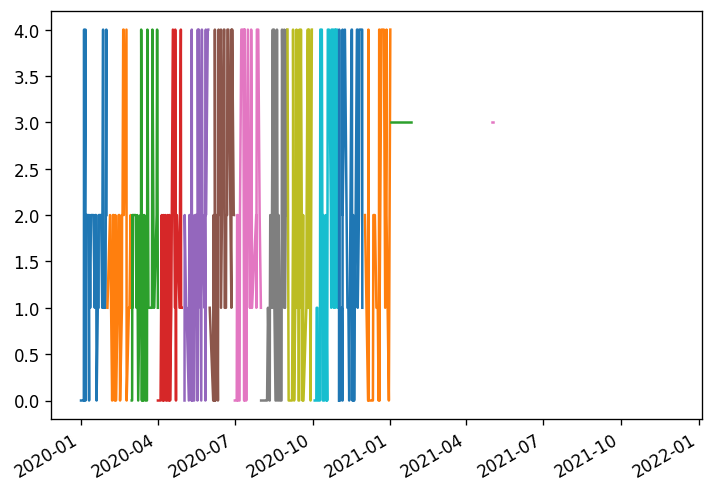

In [ ]:
plt.figure(figsize=(7, 5))
X_train.loc["2020":"2021", "label"].resample("m").plot()
plt.show

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(pipe_Kmeans, k=(4,12), 
#                               metric='calinski_harabasz', timings=False)

In [ ]:
list=[]
for i in range(4):
  for j in range(1, int((3*np.random.rand(1)+1))):
    print(f" Student {i} , Suject { j }")
    list.append([i, j ])
pd.DataFrame(list)

 Student 0 , Suject 1
 Student 1 , Suject 1
 Student 2 , Suject 1


,0,1
0,0,1
1,1,1
2,2,1


In [ ]:
X, y= load_iris(return_X_y=True)

##  Prediction 
<img src="https://i.ibb.co/4JtGHCy/predict.jpg" width=150 ></img>

In [ ]:
y_pred= Rds.predict(X_test)

## Tests:

In [ ]:
pip install   scikit-learn -U 

     |████████████████████████████████| 6.8MB 5.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
! pip  install yellowbrick -U 

     |████████████████████████████████| 276kB 5.5MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import calinski_harabasz_score



In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:


# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

NameError: ignored

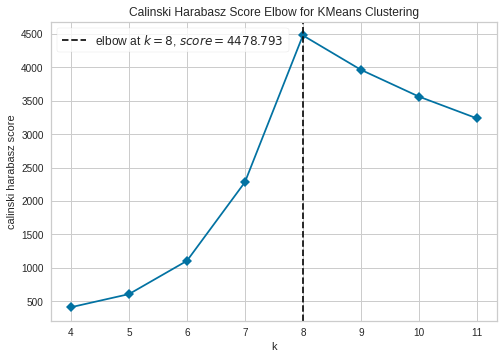

In [ ]:
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

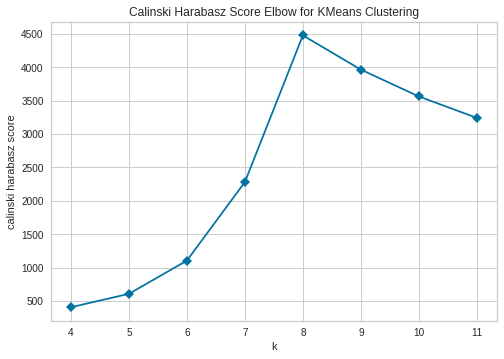

In [ ]:
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

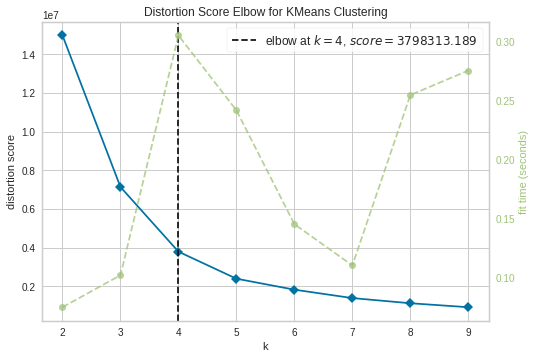

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d8392710>,
                 k=None, model=None)

In [ ]:
from yellowbrick.datasets.loaders import load_nfl
from yellowbrick.cluster.elbow import kelbow_visualizer
X, y = load_nfl()

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), X, k=(2,10))

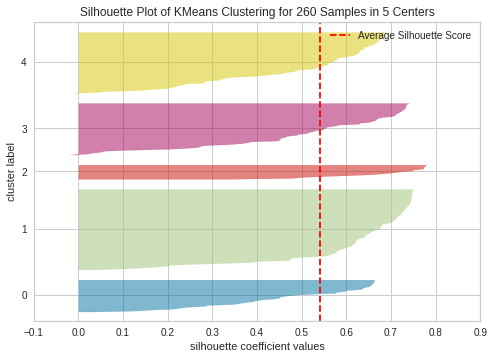

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X, y = load_nfl()

# Specify the features to use for clustering
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

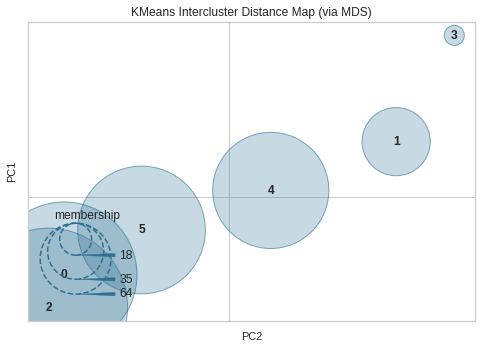

In [ ]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

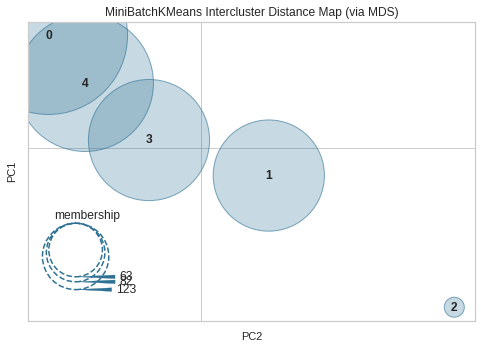

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d2bcd6a0>,
                     model=None)

In [ ]:
from yellowbrick.cluster import intercluster_distance
from yellowbrick.datasets import load_nfl
from sklearn.cluster import MiniBatchKMeans

X, _ = load_nfl()
intercluster_distance(MiniBatchKMeans(5, random_state=777), X)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


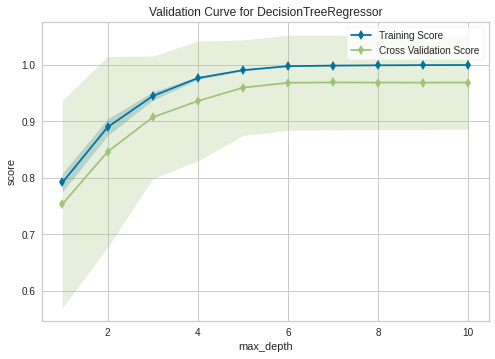

In [ ]:
import numpy as np

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor

# Load a regression dataset
X, y = load_energy()

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_game

# Load a classification data set
X, y = load_game()

# Encode the categorical data with one-hot encoding
X = OneHotEncoder().fit_transform(X)

# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve( SVC(), param_name="gamma", param_range=param_range, 
                       logx=True, cv=cv, scoring="f1_weighted", n_jobs=8)
viz.fit(X, y)
viz.show()

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

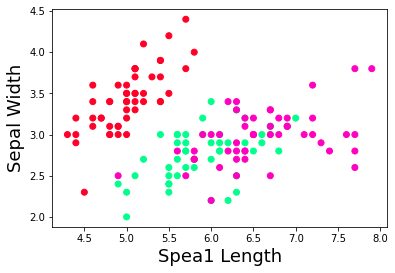

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [ ]:
 from sklearn.cluster     import KMeans
km = KMeans(n_clusters = 2)

In [ ]:
? Kmeans

Object `Kmeans` not found.


In [ ]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.428     ]]


In [ ]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

Text(0.5, 1.0, 'Predicted')

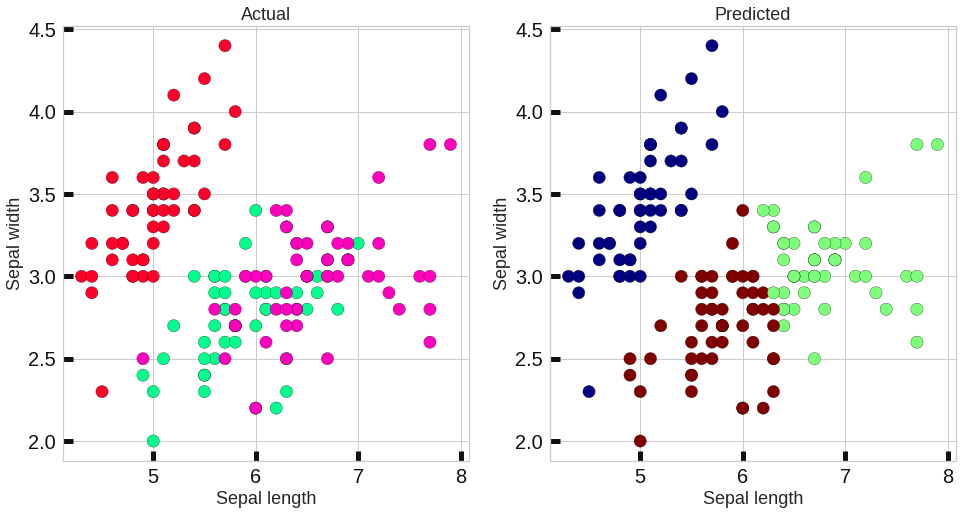

In [ ]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

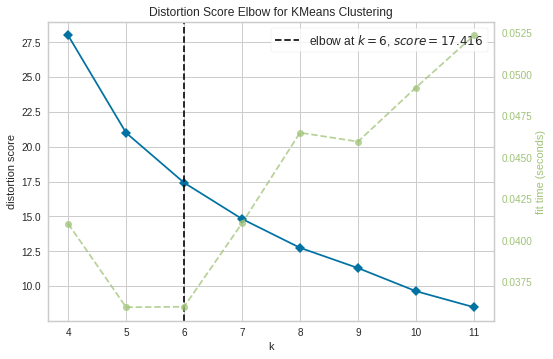

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

## Test Evalution 


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


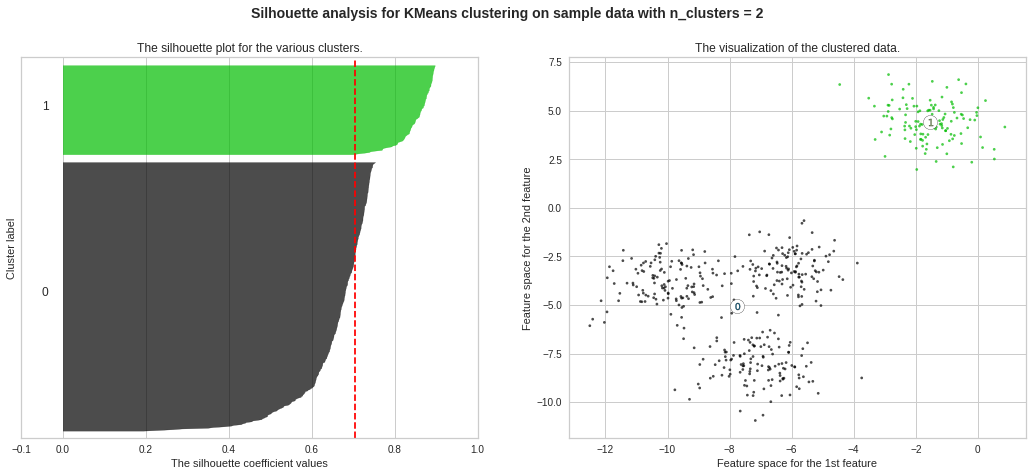

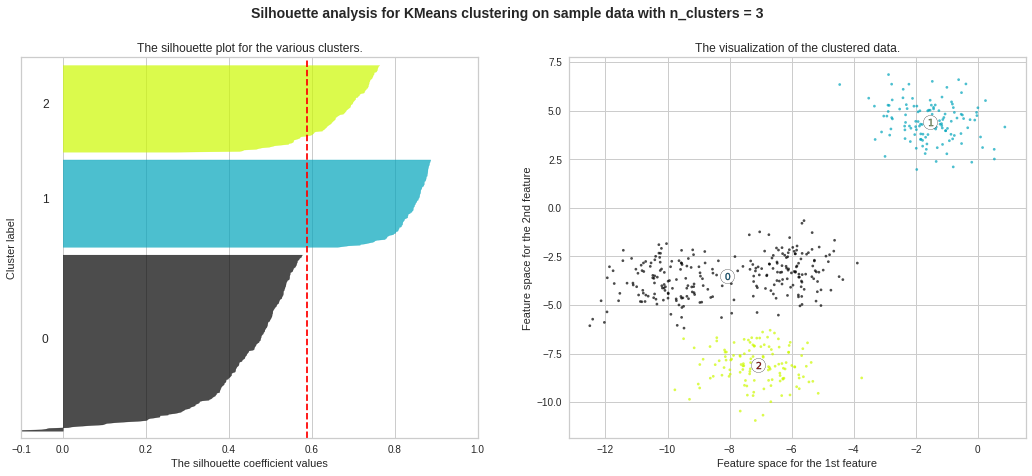

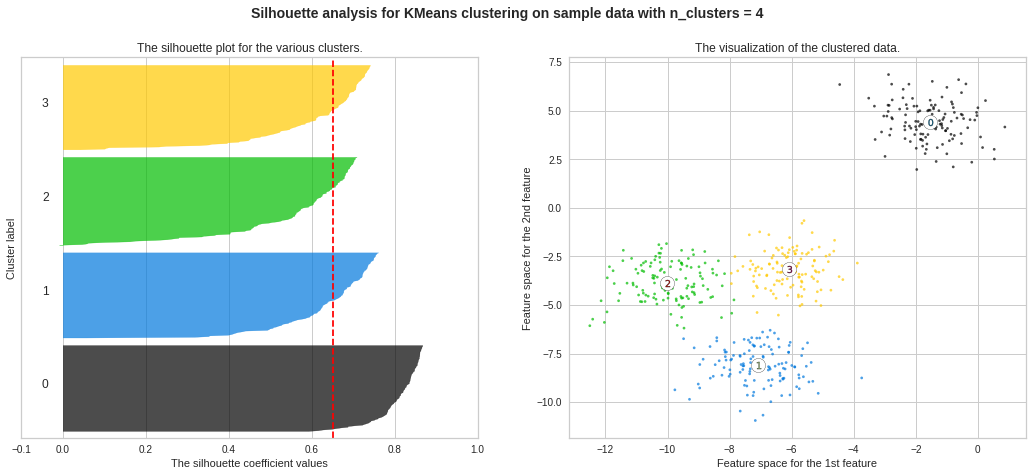

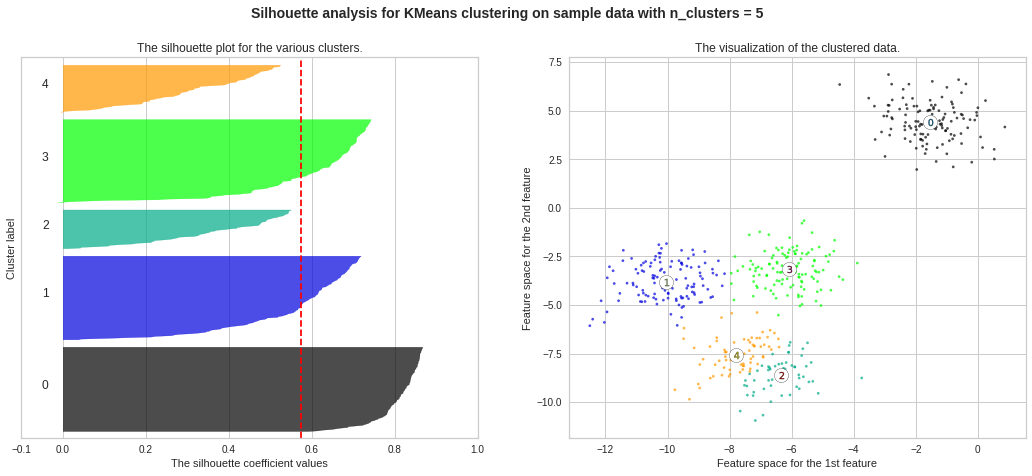

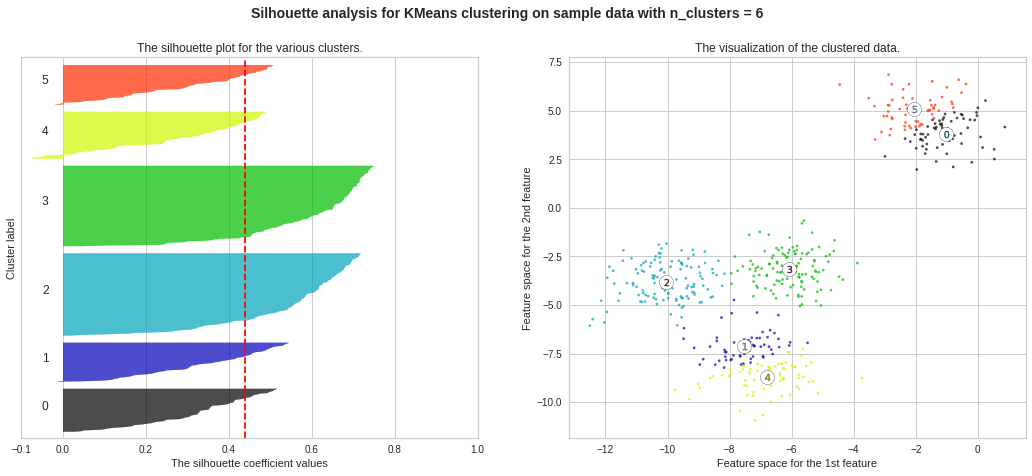

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

0	0	53	2	91	5	1	0	0	5	8	2020	16	56	14	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0

to Identify   Clusters
we have to elaborate a function : 
 -  Nbr  of Avtivity  submited  (*.5)
 -  Activity Average Mark  ( *2)
 -  Sumitted duration ( elapsed   time   *1.5) 
 -  Acitivity Difficulty  (*1.5)

A = 645
B = 344

Clustering  by  Subject 


https://subscription.packtpub.com/video/data/9781839213632/p5/video5_5/t-sne-dimension-reduction
samir.amri@moe.bh   NEWnew#@1235


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                   random_state=0)


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'site' : ['walmart', 'amazon', 'alibaba', 'flipkart','alibaba','flipkart','walmart', 'amazon', 'alibaba', 'flipkart'],
                   'Product_Category' : ['Kitchen', 'Home-Decor', 'Gardening', 'Health', 'Beauty', 'Garments',
                                         'Gardening', 'Health', 'Beauty', 'Garments'] ,
                   'Product' : ['Oven','Sofa-set','digging spade','fitness band','sunscreen','pyjamas','digging spade',
                               'fitness band','sunscreen','pyjamas'],
                   'Sales' : [2000,3000,4000,5000,6000,9000,3000,2500,1020,950]})
df

,site,Product_Category,Product,Sales
0,walmart,Kitchen,Oven,2000
1,amazon,Home-Decor,Sofa-set,3000
2,alibaba,Gardening,digging spade,4000
3,flipkart,Health,fitness band,5000
4,alibaba,Beauty,sunscreen,6000
5,flipkart,Garments,pyjamas,9000
6,walmart,Gardening,digging spade,3000
7,amazon,Health,fitness band,2500
8,alibaba,Beauty,sunscreen,1020
9,flipkart,Garments,pyjamas,950


In [ ]:
df.pivot_table( index=['Product_Category', 'Product'], values=['Sales'], columns=['site'])


,,Sales
Product_Category,Product,
Beauty,sunscreen,3510
Gardening,digging spade,3500
Garments,pyjamas,4975
Health,fitness band,3750
Home-Decor,Sofa-set,3000
Kitchen,Oven,2000


In [ ]:
df.pivot_table( index=['Product_Category', 'Product'], values=['Sales'], columns=['site'])


Sales                         
site                           alibaba  amazon flipkart walmart
Product_Category Product                                       
Beauty           sunscreen      3510.0     NaN      NaN     NaN
Gardening        digging spade  4000.0     NaN      NaN  3000.0
Garments         pyjamas           NaN     NaN   4975.0     NaN
Health           fitness band      NaN  2500.0   5000.0     NaN
Home-Decor       Sofa-set          NaN  3000.0      NaN     NaN
Kitchen          Oven              NaN     NaN      NaN  2000.0

### Old   dataset

In [ ]:

for j in range(1,101):
    for i in range(1, 7):
        course_id="course_"+ str(i)
        course= {
        "course_code": course_id ,
        "act_count": course_ref[course_id] , #np.random.randint(5,30),
        "course_lastyear_mark": np.random.randint(60,101),
        "total_video_sec": int(np.random.randint(1801)),
        "nb_video": int(np.random.randint(20)),
        "nb_download": int(np.random.randint(20)),
        "nb_discus_participate" :int(np.random.randint(30))
         } 
        df_course=df_course.append(course, ignore_index=True)



KeyError: ignored

In [ ]:
df_course=df_course[1:]

In [ ]:
df_course.head(7)

,course_code,act_count,course_lastyear_mark,total_video_sec,nb_video,nb_download,nb_discus_participate
1,course_1,10,66,1657,10,8,25
2,course_2,15,100,593,14,17,23
3,course_3,7,75,1597,14,10,8
4,course_4,18,80,684,6,3,0
5,course_5,23,79,407,4,15,0
6,course_6,27,64,236,11,4,4
7,course_1,10,61,495,4,19,0


In [ ]:
df_course.to_csv("./Data/Courses.csv")

In [ ]:
list=[]

for i in range(100):
  for j in range (0, int((30*np.random.rand(1)+1))):
    course_id=random.choice([ "course_"+str(k) for k in range(1,7)])
    activities= {
      "student_id": i ,
      # "school": "Sc_1",
      # "grade": int((11*np.random.rand(1)+1)),
      # "gender": random.choice(["M", "F"]),
      # "governorate": "North",
      #"subject_grade_mark": 1 ,
      "Course_code":course_id,   #random.choice([ "Course_"+str(k) for k in range(6)]), 
      "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
      "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
      "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
      # "Competence-id":  random.choice([ "Cp_"+str(k) for k in range(10)]), 
      "Activity_id": random.choice([f"Assignement_{int(10*np.random.rand(1))}" , f"Quizz_{int(10*np.random.rand(1)+1)}"]),
      "Acivity_diff":  int((4*np.random.rand(1)+1)),
      "Activity_subm_time": int((270*np.random.rand(1)+30)) ,
      "StartTime": randomtimestamp(start_year=2020),
      "Acivity_mark": int((10*np.random.rand(1))),
      "Nb_Cp": int((np.random.rand(1)*2+1)),



        "act_count": course_ref[course_id] , #np.random.randint(5,30),
        "course_lastyear_mark": np.random.randint(60,101),
        "total_video_sec": int(np.random.randint(1801)),
        "nb_video": int(np.random.randint(20)),
        "nb_download": int(np.random.randint(20)),
        "nb_discus_participate" :int(np.random.randint(30)) 
}
    list.append(activities)
df_act=pd.DataFrame(list)
   
    

- the adtaset of all Bank clients  dont  have a SCore DATA ..  The Score  is created gradually . accorind to th enumber of trascations......   Montly income, permonth below a threshold.. .... ..Value.   -   A

In [ ]:
import requests 
import statsmodels.api as sm 
import io 
import pandas as pd 

In [ ]:
# Load Dataset 
DATA_URL="http://robjhyndman.com/tsdldata/data/nybirths.dat" 
fopen = requests.get(DATA_URL).content 
ds=pd.read_csv(io.StringIO(fopen.decode('utf-8')),  header=None, names=['birthcount']) 
print(ds.head()) 
 


   birthcount
0      26.663
1      23.598
2      26.931
3      24.740
4      25.806


In [ ]:
ds.head()

,birthcount
Date,
1946-01-31,26.663
1946-02-28,23.598
1946-03-31,26.931
1946-04-30,24.740
1946-05-31,25.806


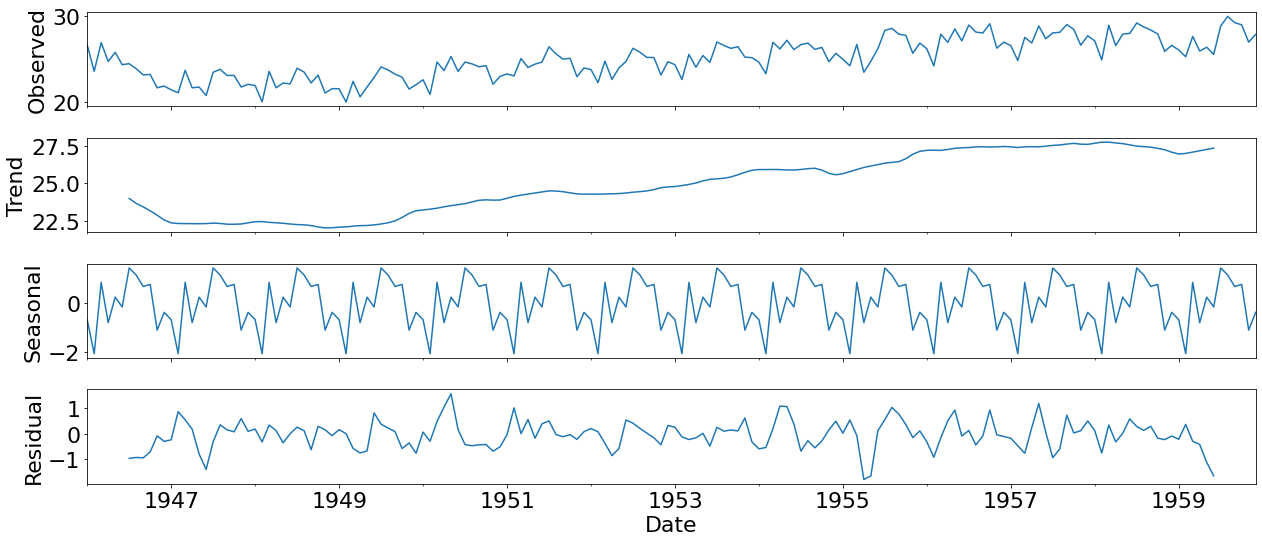

In [ ]:
# Add time index 
date=pd.date_range("1946-01-01", "1959-12-31", freq="1M") 
ds['Date']=pd.DataFrame(date) 
ds = ds.set_index('Date') 
 
# decompose dataset 
res = sm.tsa.seasonal_decompose(ds.birthcount, model="additive") 
resplot = res.plot() 

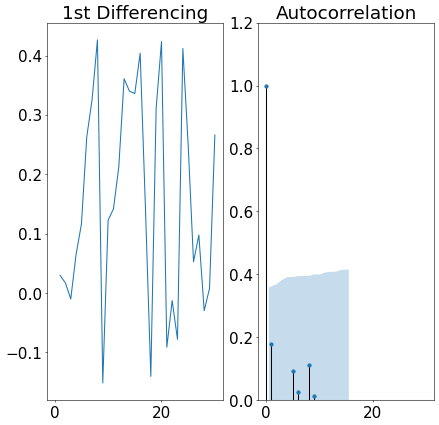

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':50})

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff(), ); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
df.head()

,date,value
0,1980-01-01,0.829894
1,1981-01-01,0.859511
2,1982-01-01,0.876689
3,1983-01-01,0.866707
4,1984-01-01,0.932052
